* Student name: Tamjid Ahsan
* Student pace: Full Time
* Scheduled project review date/time: June 24, 2021, 05:00 PM [DST]
* Instructor name: James Irving

# Todo:
## Coding
- docstrings
- commenting
<!-- - statistical measure of model fit goodness -->
<!--     - rmse, mae of test and predict -->
<!--     - oob information or aic, bic -->
<!--     - comparison df -->
<!--     - turn off confidance interval -->
<!--     - color option for train test split in result -->
- grid parameter tuning option in function
<!--  - mend models -->
<!-- - update dash fig {seeming CAN NOT BE DONE by me} -->

<br>


## EDA
   - eda on time series
   - public facing eda
   - individual eda
<!-- - show seasonality plot for best models as eda -->
<!-- - explore bad rois  -->
<!-- - train model -->
<!-- - save model -->
<!-- - show data of top 5 models. -->
<!-- - turn on/off process in looping. -->
<!-- - save test pred -->
<!-- - save model locally -->
<!-- - ggplot facecolor -->

# INTRODUCTION

# BUSINESS PROBLEM

# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imports_and_functions as fn
from imports_and_functions.packages import *

%matplotlib inline
mpl.rcParams['figure.facecolor'] = '#232323'

# OBTAIN

## Dataset information

In [3]:
# leading data
df = pd.read_csv('./data/zillow_raw_2021.csv')

In [4]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2020-12-31    float64
2021-01-31    float64
2021-02-28    float64
2021-03-31    float64
2021-04-30    float64
Length: 313, dtype: object

In [5]:
# display dataset
df

RegionID  SizeRank  RegionName  ... 2021-02-28 2021-03-31 2021-04-30
0         61639         0       10025  ...  1092196.0  1104487.0  1121360.0
1         84654         1       60657  ...   515983.0   517482.0   519569.0
2         61637         2       10023  ...  1120821.0  1118048.0  1120428.0
3         91982         3       77494  ...   365462.0   370763.0   376914.0
4         84616         4       60614  ...   656818.0   659416.0   662782.0
...         ...       ...         ...  ...        ...        ...        ...
30837     87060     34430       66045  ...   225272.0   229287.0   233174.0
30838     90986     34430       75599  ...    49377.0    49610.0    50222.0
30839     58379     34430        1470  ...   399243.0   398659.0   401526.0
30840     58117     35187         822  ...   171867.0   171381.0   172291.0
30841     58110     35187         801  ...    38316.0    37639.0    36916.0

[30842 rows x 313 columns]

In [60]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1996-01-31',
       ...
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
       '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30'],
      dtype='object', length=313)

column explainer:

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName']

In [7]:
# information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Columns: 313 entries, RegionID to 2021-04-30
dtypes: float64(304), int64(3), object(6)
memory usage: 73.7+ MB


RegionID  SizeRank  RegionName  ... 2021-02-28 2021-03-31 2021-04-30
0     61639         0       10025  ...  1092196.0  1104487.0  1121360.0
1     84654         1       60657  ...   515983.0   517482.0   519569.0
2     61637         2       10023  ...  1120821.0  1118048.0  1120428.0
3     91982         3       77494  ...   365462.0   370763.0   376914.0
4     84616         4       60614  ...   656818.0   659416.0   662782.0

[5 rows x 313 columns]

# SCRUB & EXPLORE

## Selecting Queens, New York data

In [8]:
## selecting NY zipcodes
df_ny = df.loc[(df['State'] == 'NY')
               & (df['CountyName'] == 'Queens County')].reset_index()
df_ny.drop(['index'], axis=1, inplace=True)
df_ny

RegionID  SizeRank  RegionName  ... 2021-02-28 2021-03-31 2021-04-30
0      62087        21       11375  ...   421097.0   416426.0   411762.0
1      62088       110       11377  ...   434951.0   433844.0   435544.0
2      62067       122       11355  ...   466919.0   465487.0   464428.0
3      62093       167       11385  ...   703008.0   704874.0   707296.0
4      62085       184       11373  ...   413289.0   415127.0   416809.0
5      62084       279       11372  ...   390607.0   388914.0   389908.0
6      62004       393       11101  ...   833444.0   827952.0   822370.0
7      62080       496       11368  ...   406164.0   404570.0   403652.0
8      62066       581       11354  ...   416733.0   414523.0   411965.0
9      62086       732       11374  ...   414567.0   413708.0   412868.0
10     62120       858       11434  ...   415070.0   414574.0   414619.0
11     62179       947       11691  ...   556678.0   558419.0   560278.0
12     62118      1271       11432  ...   652898.0   653655.0   655697.0
13     62121      1713       11435  ...   376961.0   378580.0   378927.0
14     62006      2121       11103  ...   752601.0   751708.0   751877.0
15     62077      2154       11365  ...   705044.0   705832.0   706928.0
16     62079      2222       11367  ...   417844.0   417757.0   418022.0
17     62069      2809       11357  ...   820842.0   821812.0   822467.0
18     62076      3171       11364  ...   510305.0   509562.0   508134.0
19     62070      3506       11358  ...   897735.0   897941.0   897168.0
20     62007      3574       11104  ...   466181.0   467021.0   464044.0
21     62090      4200       11379  ...   763210.0   764520.0   766161.0
22     62099      4385       11413  ...   575442.0   577542.0   581338.0
23     62106      4719       11420  ...   600657.0   602680.0   604603.0
24     62100      4821       11414  ...   506686.0   507868.0   509471.0
25     62098      5130       11412  ...   575170.0   577937.0   581654.0
26     62073      5133       11361  ...   795332.0   795355.0   795151.0
27     62089      5391       11378  ...   737800.0   737990.0   738171.0
28     62107      5414       11421  ...   606259.0   607544.0   607973.0
29     62105      5538       11419  ...   612966.0   616095.0   620214.0
30     62119      5589       11433  ...   551655.0   554616.0   557119.0
31     62072      5676       11360  ...   499535.0   497718.0   496283.0
32     62104      5756       11418  ...   607392.0   609746.0   612122.0
33     62101      5769       11415  ...   310914.0   304934.0   297538.0
34     62109      6259       11423  ...   625767.0   630411.0   638006.0
35     62081      6436       11369  ...   696911.0   701237.0   707477.0
36     62182      6529       11694  ...   640819.0   644862.0   648065.0
37     62108      6570       11422  ...   572342.0   571554.0   572027.0
38     62103      6841       11417  ...   612457.0   615680.0   619167.0
39     62113      6886       11427  ...   647574.0   651496.0   657234.0
40     62180      7098       11692  ...   266741.0   272745.0   275388.0
41     62082      7324       11370  ...   715316.0   715999.0   715961.0
42     62068      7633       11356  ...   728028.0   730516.0   733839.0
43     62115      7895       11429  ...   577540.0   580048.0   583710.0
44     62074      8062       11362  ...   591694.0   591611.0   591892.0
45     62097      8120       11411  ...   568897.0   568245.0   568945.0
46     62112      8198       11426  ...   652363.0   655331.0   657969.0
47     62114      8554       11428  ...   611535.0   616593.0   623049.0
48     62181      8812       11693  ...   350591.0   355157.0   356097.0
49     61979      8912       11004  ...   400391.0   405799.0   409080.0
50     62102      9277       11416  ...   609687.0   612198.0   614847.0
51     62122      9306       11436  ...   532509.0   534761.0   535380.0
52     62078      9616       11366  ...   883587.0   882933.0   882687.0
53     62075     12001       11363  ...   932673.0   931076.0 

In [9]:
df_ny.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'],
           inplace=True)

In [10]:
df_ny_reshaped = fn.melt_data(df_ny)
df_ny_reshaped

RegionName State      City  ...     CountyName       date     value
0           11375    NY  New York  ...  Queens County 1996-01-31  129189.0
1           11377    NY  New York  ...  Queens County 1996-01-31  111191.0
2           11355    NY  New York  ...  Queens County 1996-01-31  120873.0
3           11385    NY  New York  ...  Queens County 1996-01-31  215700.0
4           11373    NY  New York  ...  Queens County 1996-01-31  114715.0
...           ...   ...       ...  ...            ...        ...       ...
16715       11416    NY  New York  ...  Queens County 2021-04-30  614847.0
16716       11436    NY  New York  ...  Queens County 2021-04-30  535380.0
16717       11366    NY  New York  ...  Queens County 2021-04-30  882687.0
16718       11363    NY  New York  ...  Queens County 2021-04-30  928875.0
16719       11430    NY  New York  ...  Queens County 2021-04-30  642980.0

[16720 rows x 7 columns]

In [11]:
df_ny_reshaped.dtypes

RegionName             int64
State                 object
City                  object
Metro                 object
CountyName            object
date          datetime64[ns]
value                float64
dtype: object

In [12]:
df_ny_reshaped['RegionName'] = df_ny_reshaped['RegionName'].astype('str')
df_ny_reshaped.set_index('date', inplace=True)

In [13]:
df_ny_reshaped.dtypes

RegionName     object
State          object
City           object
Metro          object
CountyName     object
value         float64
dtype: object

In [14]:
df_ny_reshaped

RegionName State  ...     CountyName     value
date                         ...                         
1996-01-31      11375    NY  ...  Queens County  129189.0
1996-01-31      11377    NY  ...  Queens County  111191.0
1996-01-31      11355    NY  ...  Queens County  120873.0
1996-01-31      11385    NY  ...  Queens County  215700.0
1996-01-31      11373    NY  ...  Queens County  114715.0
...               ...   ...  ...            ...       ...
2021-04-30      11416    NY  ...  Queens County  614847.0
2021-04-30      11436    NY  ...  Queens County  535380.0
2021-04-30      11366    NY  ...  Queens County  882687.0
2021-04-30      11363    NY  ...  Queens County  928875.0
2021-04-30      11430    NY  ...  Queens County  642980.0

[16720 rows x 6 columns]

## Slicing

In [15]:
# list of all zipcodes
zipcode_list = df_ny_reshaped['RegionName'].unique().tolist()
print('Total zipcodes: ', len(zipcode_list))

# converting to dict
TS = {}
for zipcode in zipcode_list:
    temp_df = df_ny_reshaped.groupby('RegionName').get_group(
        zipcode).sort_index()['value']
    TS[zipcode] = temp_df

# sanity check
print('Keys in the dict: ', len(TS.keys()))
print('All zipcodes accounted for: ', len(zipcode_list) == len(TS.keys()))

Total zipcodes:  55
Keys in the dict:  55
All zipcodes accounted for:  True


In [16]:
# converting to pandas.DataFrame
ts_df = pd.DataFrame(TS)
ts_df

11375     11377     11355  ...     11366     11363     11430
date                                      ...                              
1996-01-31  129189.0  111191.0  120873.0  ...  227326.0  346968.0  253175.0
1996-02-29  128476.0  110784.0  120431.0  ...  227169.0  347413.0  252204.0
1996-03-31  128105.0  110823.0  120228.0  ...  226699.0  348278.0  251766.0
1996-04-30  127360.0  110714.0  119757.0  ...  225982.0  349253.0  251324.0
1996-05-31  127055.0  110794.0  119493.0  ...  225593.0  350497.0  251464.0
...              ...       ...       ...  ...       ...       ...       ...
2020-12-31  431259.0  432383.0  471009.0  ...  883397.0  934384.0  642500.0
2021-01-31  427765.0  434379.0  469184.0  ...  884268.0  934303.0  643663.0
2021-02-28  421097.0  434951.0  466919.0  ...  883587.0  932673.0  642995.0
2021-03-31  416426.0  433844.0  465487.0  ...  882933.0  931076.0  641942.0
2021-04-30  411762.0  435544.0  464428.0  ...  882687.0  928875.0  642980.0

[304 rows x 55 columns]

In [17]:
print(ts_df.index.freq)

None


In [18]:
ts_df.index.freq = 'M'

In [19]:
ts_df.index.freq

<MonthEnd>

# EDA

# MODEL

## Model on test Zipcode

In [20]:
print(zipcode_list)

['11375', '11377', '11355', '11385', '11373', '11372', '11101', '11368', '11354', '11374', '11434', '11691', '11432', '11435', '11103', '11365', '11367', '11357', '11364', '11358', '11104', '11379', '11413', '11420', '11414', '11412', '11361', '11378', '11421', '11419', '11433', '11360', '11418', '11415', '11423', '11369', '11694', '11422', '11417', '11427', '11692', '11370', '11356', '11429', '11362', '11411', '11426', '11428', '11693', '11004', '11416', '11436', '11366', '11363', '11430']


In [21]:
# testing one zipcode
zipcode = random.choice(zipcode_list)

In [22]:
print('\033[1m \033[91m' +
      f"""Selected Zipcode : {ts_df[zipcode].name}""")
ts_df[zipcode]

 Selected Zipcode : 11692


date
1996-01-31     96399.0
1996-02-29     94856.0
1996-03-31     92825.0
1996-04-30     90456.0
1996-05-31     88179.0
                ...   
2020-12-31    254651.0
2021-01-31    261011.0
2021-02-28    266741.0
2021-03-31    272745.0
2021-04-30    275388.0
Freq: M, Name: 11692, Length: 304, dtype: float64

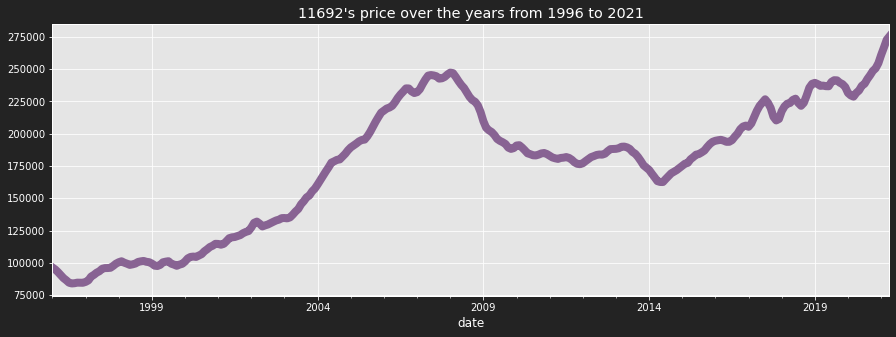

In [23]:
# timeline
ts_df[zipcode].plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(ts_df[zipcode].index[0]).split(" ")[0].split("-")[0]} to {
        str(ts_df[zipcode].index[-1]).split(" ")[0].split("-")[0]}"""
);

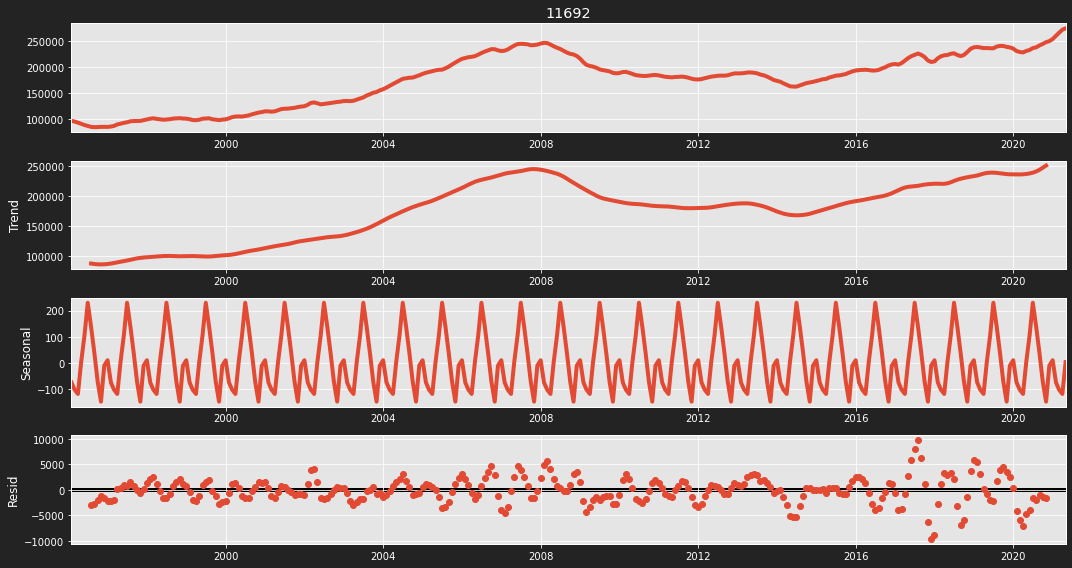

In [24]:
with mpl.rc_context():
    mpl.rc('figure', figsize=(15,8))
    mpl.rc('lines', linewidth = 4)
    tsa.seasonal_decompose(ts_df[zipcode].dropna()).plot();

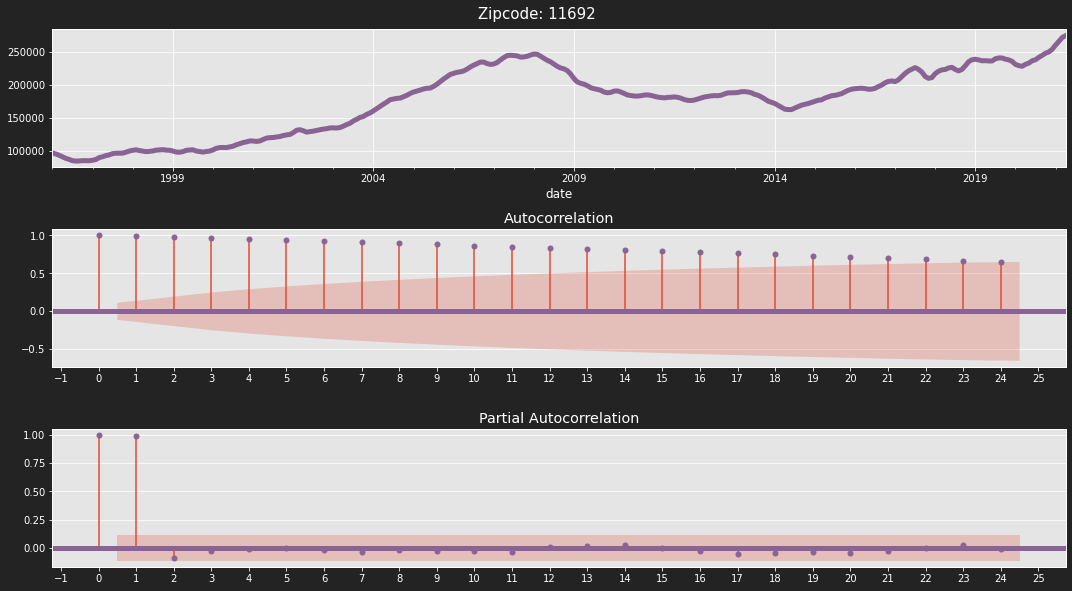

In [25]:
fn.plot_acf_pacf(ts_df[zipcode].dropna());

comment

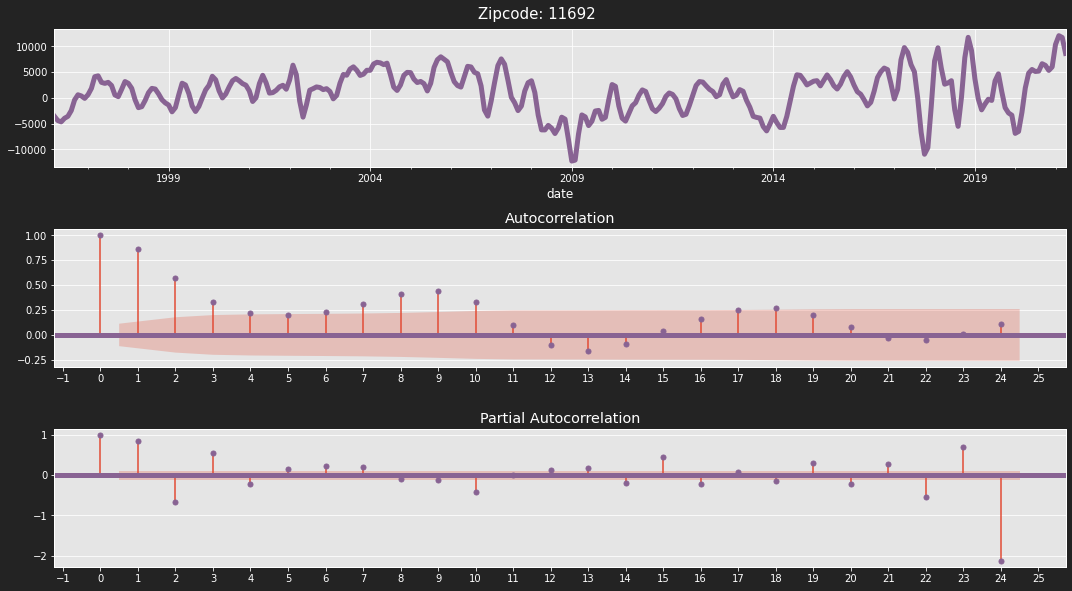

In [26]:
fn.plot_acf_pacf(ts_df[zipcode].diff(2).dropna());

comment

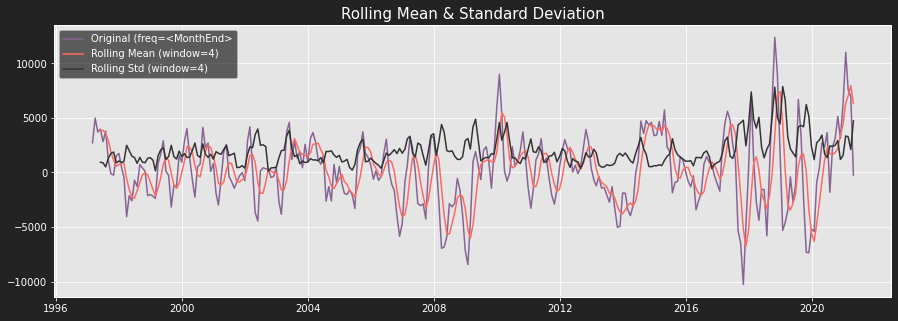

Test Statistic  #Lags Used  ...  p<.05  Stationary?
ADF Result       -4.272979          16  ...   True         True

[1 rows x 6 columns]

In [27]:
fn.stationarity_check((ts_df[zipcode].diff(1)).diff(12).dropna(), window=4)

### Base MODEL

#### Model 1

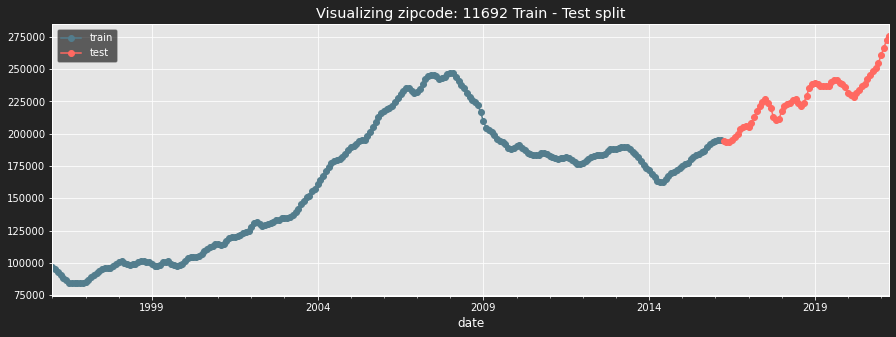

In [28]:
## train test split
train_size = 0.8
split_idx = round(len(ts_df[zipcode].dropna()) * train_size)

## Split
train = ts_df[zipcode].dropna().iloc[:split_idx]
test = ts_df[zipcode].dropna().iloc[split_idx:]
# test = ts_df[zipcode].dropna().iloc[len(ts_df[zipcode])-36:]
# train = ts_df[zipcode].dropna().iloc[:len(ts_df[zipcode])-36]

## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(ax=ax, marker='o')
train.plot(**kws, label='train',color='#537d8d')
test.plot(**kws, label='test',color='#ff6961')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

In [29]:
# selected params for testing
# time series is not stationary, starting params
p = 0
d = 1
q = 0
# seasonality in data, starting with SARIMAX model
P = 0
D = 1
Q = 0
m = 12

In [30]:
order = (p, d, q)
seasonal_order = (P, D, Q, m)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              11692   No. Observations:                  243
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2139.871
Date:                            Sat, 19 Jun 2021   AIC                           4281.742
Time:                                    02:03:46   BIC                           4285.180
Sample:                                01-31-1996   HQIC                          4283.129
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.04e+06   6.02e+05     11.703      0.000    5.86e+06    8.22e+06
===================================================================================
Ljung-Box (L1) (Q):                 122.12   Jarque-Bera (JB):                 3.12
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               1.60   Skew:                            -0.20
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                                                       Model Diagonostics of 11692                                                                      


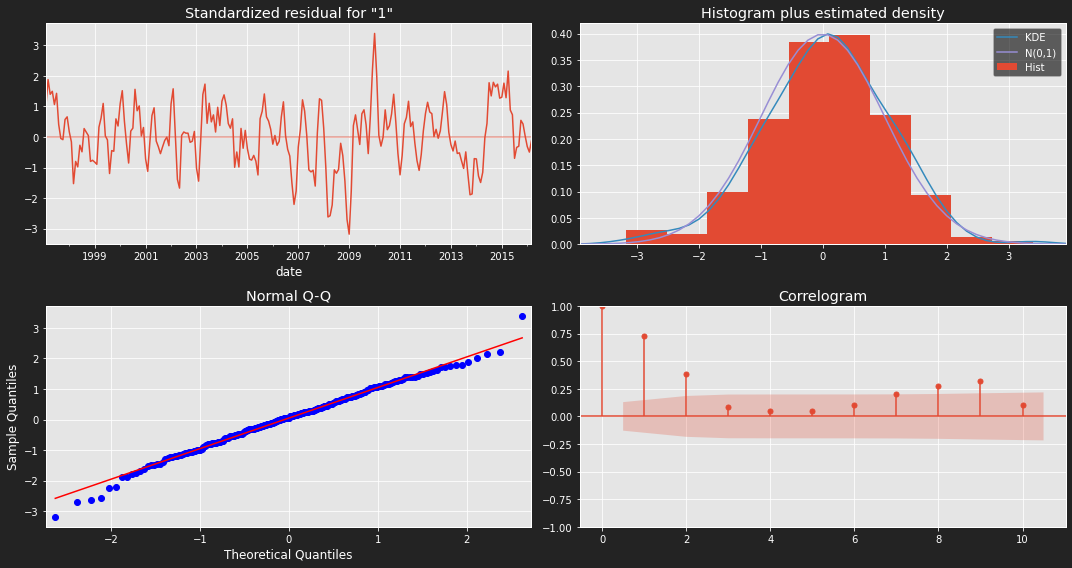

                                                                       Performance on test data of 11692                                                                      
Root Mean Squared Error of test and prediction: 18895.32884031412
Mean Squared Error: 357033451.9836066
Mean Absolute Error: 15465.16393442623


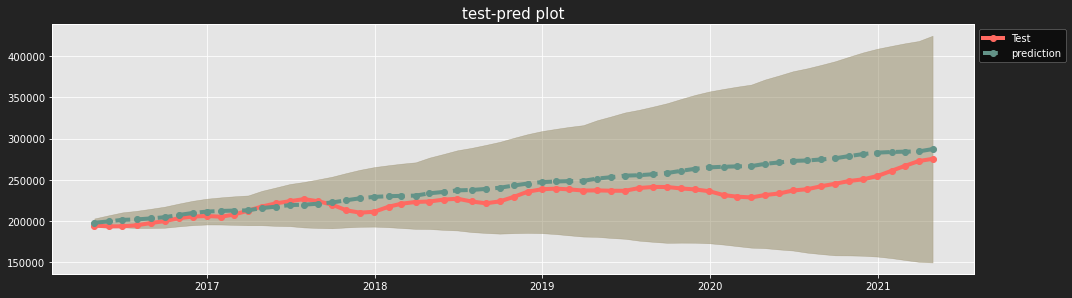

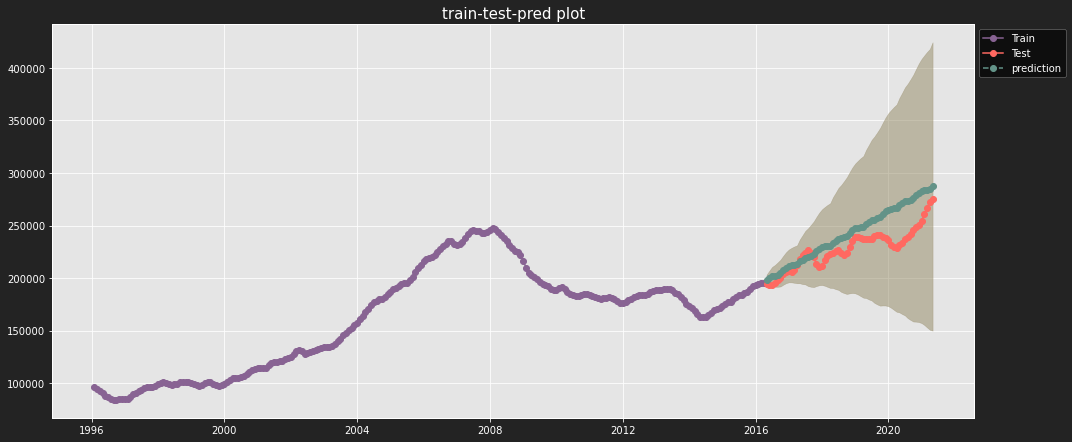

In [31]:
fn.model_builder(train, test, order, seasonal_order, zipcode);

#### Model 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              11692   No. Observations:                  243
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood               -2061.910
Date:                            Sat, 19 Jun 2021   AIC                           4125.820
Time:                                    02:03:50   BIC                           4129.254
Sample:                                01-31-1996   HQIC                          4127.206
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.865e+06   3.77e+05     10.258      0.000    3.13e+06     4.6e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.72   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.10   Prob(JB):                         0.51
Heteroskedasticity (H):               0.83   Skew:                             0.17
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                                                       Model Diagonostics of 11692                                                                      


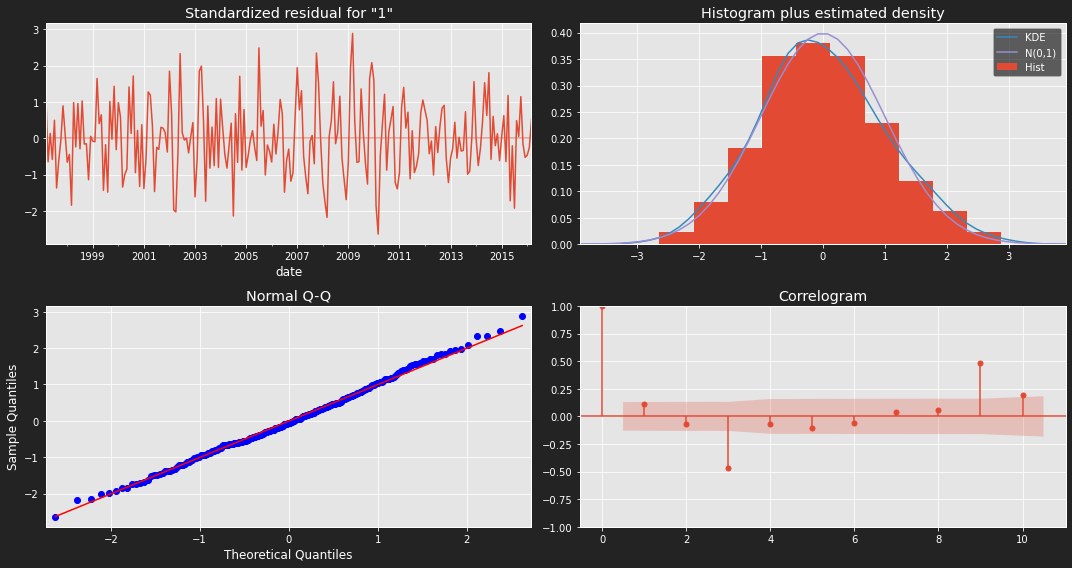

                                                                       Performance on test data of 11692                                                                      
Root Mean Squared Error of test and prediction: 12925.861109660505
Mean Squared Error: 167077885.42623392
Mean Absolute Error: 8816.180327868964


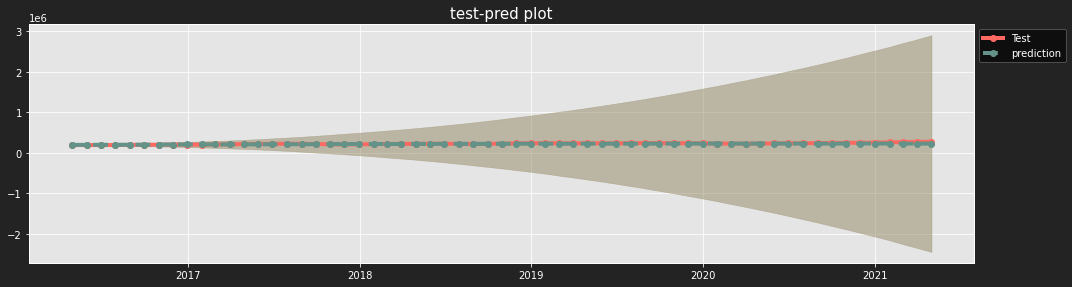

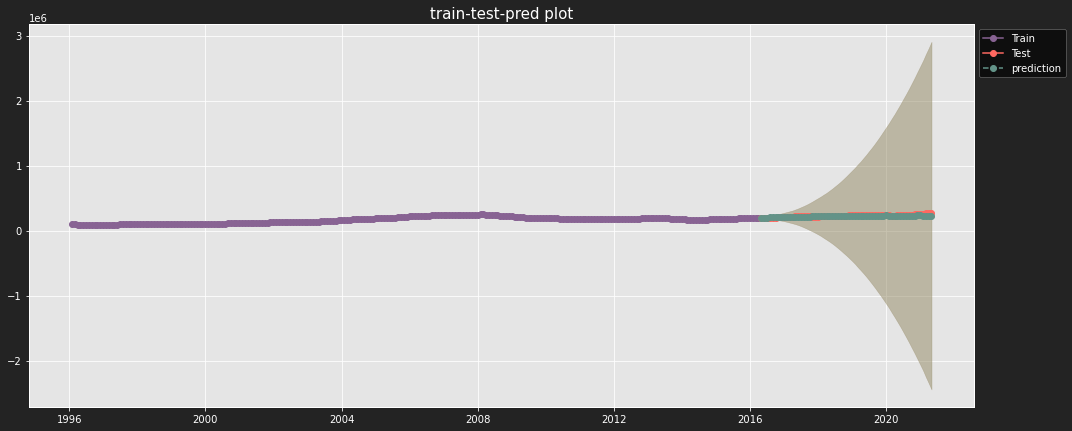

In [32]:
# selected params for testing
# time series is not stationary, starting params
p = 0
d = 2
q = 0
# seasonality in data, starting with SARIMAX model
P = 0
D = 1
Q = 0
m = 12
order = (p,d,q)
seasonal_order = (P,D,Q,m)
fn.model_builder(train, test, order, seasonal_order, zipcode);

### grid searching using  pmdarima

In [58]:
# BEST MODEL

Performing stepwise search to minimize oob
 ARIMA(0,2,0)(0,0,0)[12]             : OOB=51453071.833, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : OOB=47229900.474, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : OOB=47436844.932, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[12]             : OOB=51276016.007, Time=0.04 sec
 ARIMA(1,2,0)(2,0,0)[12]             : OOB=46280232.257, Time=0.42 sec
 ARIMA(1,2,0)(3,0,0)[12]             : OOB=46992892.533, Time=0.47 sec
 ARIMA(1,2,0)(2,0,1)[12]             : OOB=52690534.769, Time=1.18 sec
 ARIMA(1,2,0)(1,0,1)[12]             : OOB=53608838.451, Time=0.42 sec
 ARIMA(1,2,0)(3,0,1)[12]             : OOB=52704169.892, Time=2.27 sec
 ARIMA(0,2,0)(2,0,0)[12]             : OOB=45580256.338, Time=0.21 sec
 ARIMA(0,2,0)(1,0,0)[12]             : OOB=46784245.158, Time=0.07 sec
 ARIMA(0,2,0)(3,0,0)[12]             : OOB=47248893.180, Time=0.91 sec
 ARIMA(0,2,0)(2,0,1)[12]             : OOB=inf, Time=1.65 sec
 ARIMA(0,2,0)(1,0,1)[12]             : OOB=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 2)x(2, 0, [], 12)   Log Likelihood               -2108.641
Date:                             Fri, 18 Jun 2021   AIC                           4231.282
Time:                                     13:51:27   BIC                           4255.676
Sample:                                          0   HQIC                          4241.110
                                             - 243                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6332     41.466      0.329      0.742     -67.639      94.905
ar.L1          0.7545      0.377      2.000      0.045       0.015       1.494
ma.L1         -0.7661      0.384     -1.995      0.046      -1.519      -0.013
ma.L2         -0.0172      0.015     -1.144      0.253      -0.047       0.012
ar.S.L12      -0.0190      0.011     -1.683      0.092      -0.041       0.003
ar.S.L24       0.0097      0.058      0.166      0.868      -0.104       0.124
sigma2      2.252e+06   1.23e+05     18.370      0.000    2.01e+06    2.49e+06
===================================================================================
Ljung-Box (L1) (Q):                  14.92   Jarque-Bera (JB):               355.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.59
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

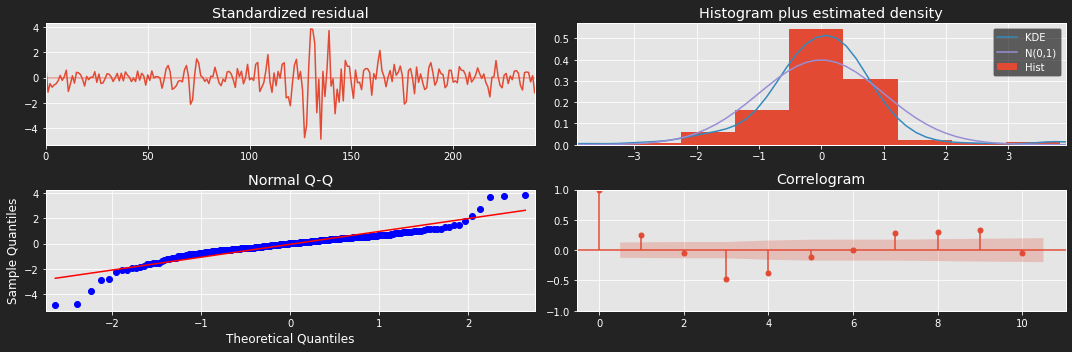

                                                                       Performance on test data of 11417                                                                      
Root Mean Squared Error of test and prediction: 35232.19339655126
Mean Squared Error: 1241307451.5319903
Mean Absolute Error: 31029.564416600693


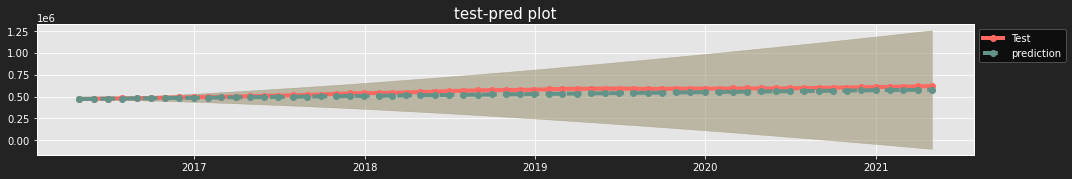

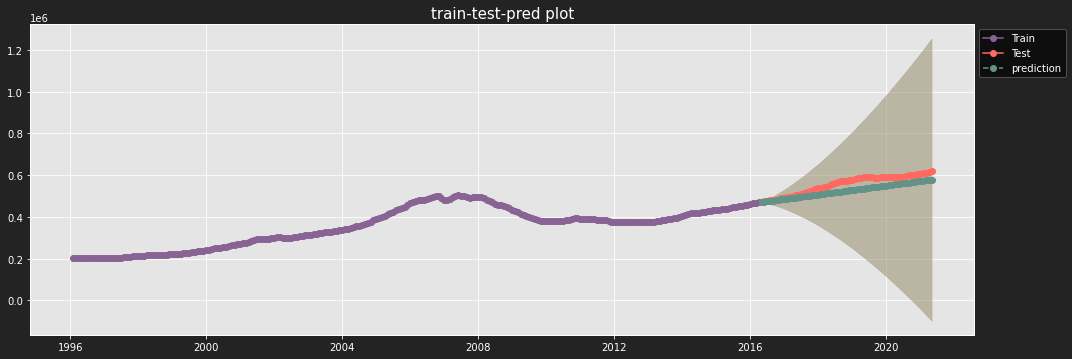

                                                                       Forecast of 11417                                                                      


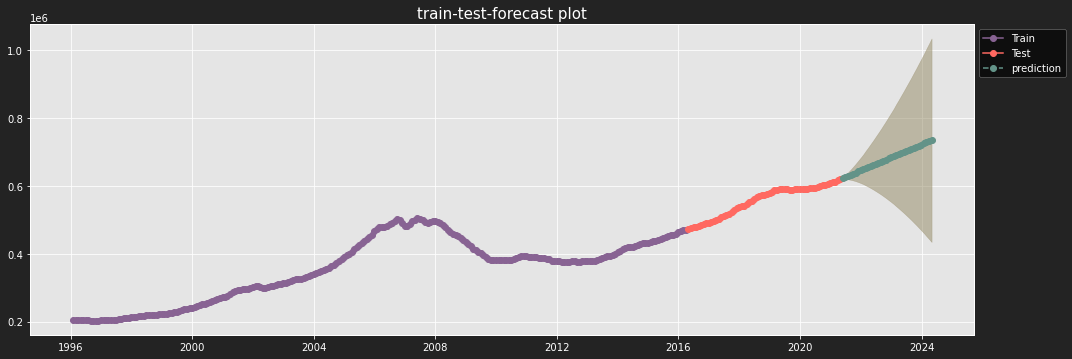

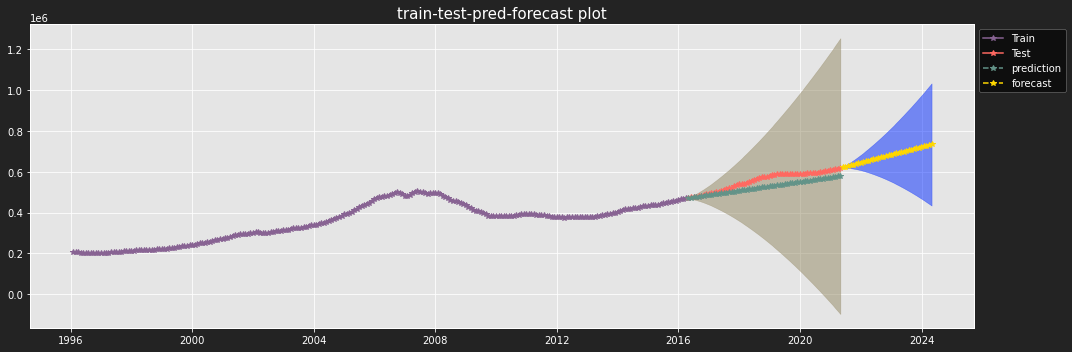

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11417                18.57  ...                 66.95               48.38

[1 rows x 5 columns]

In [139]:
fn.grid_search(ts_df[zipcode], train, test, display_roi_results=True);

## All Zipcodes

In [63]:
results_, roi_ = fn.model_loop(ts_df,
                               zipcode_list[:2],
                               show_grid_search_steps=False,
                               display_details=False)

Working on #1 out of 2 zipcodes.
Working on: 11375
------------------------------------------------------------------------------------------
Working on #2 out of 2 zipcodes.
Working on: 11377
------------------------------------------------------------------------------------------
Looping completed.


In [4]:
# filename='model'
# joblib.dump({'Results':results_, 'ROI': roi_}, f'./model/{filename}.joblib')

In [3]:
lod = joblib.load('./model/model.joblib')

In [4]:
results_ = lod['Results']
roi_ = lod['ROI']

In [5]:
type(results_)

dict

In [35]:
# roi_

## Best Zipcodes

In [36]:
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100)

mean_forecasted_roi  std_forecasted_roi
zipcode                                         
11429              22.230379           45.001385
11428              34.241021           47.287097
11427              30.558596           47.554807
11423              39.547861           48.105119
11417              18.564516           48.358635

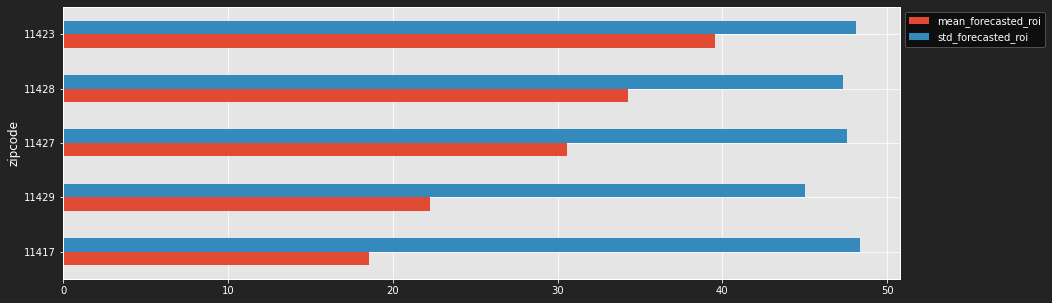

In [37]:
((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi',ascending=True)[-15:].sort_values(
    by='std_forecasted_roi',ascending=False)[-5:]) * 100).sort_values(by='mean_forecasted_roi',ascending=True).plot(kind='barh',figsize=(15,5))
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

In [38]:
best_investments = ((roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[-15:].sort_values(
    by='std_forecasted_roi')[:5]) * 100).index

best_investments

Index(['11429', '11428', '11427', '11423', '11417'], dtype='object', name='zipcode')

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11429                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(3, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(3, 2, 1)x(2, 0, [], 12)   Log Likelihood               -2086.374
Date:                             Sat, 19 Jun 2021   AIC                           4188.747
Time:                                     02:04:43   BIC                           4216.626
Sample:                                          0   HQIC                          4199.979
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.1934     33.831      0.449      0.653     -51.114      81.501
ar.L1          0.5644      

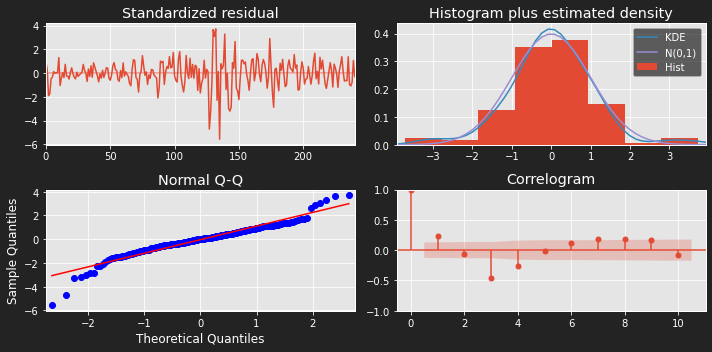

 Prediction:

Root Mean Squared Error of test and prediction: 11208.683006566753
Mean Squared Error: 125634574.74169828
Mean Absolute Error: 10022.676879967083


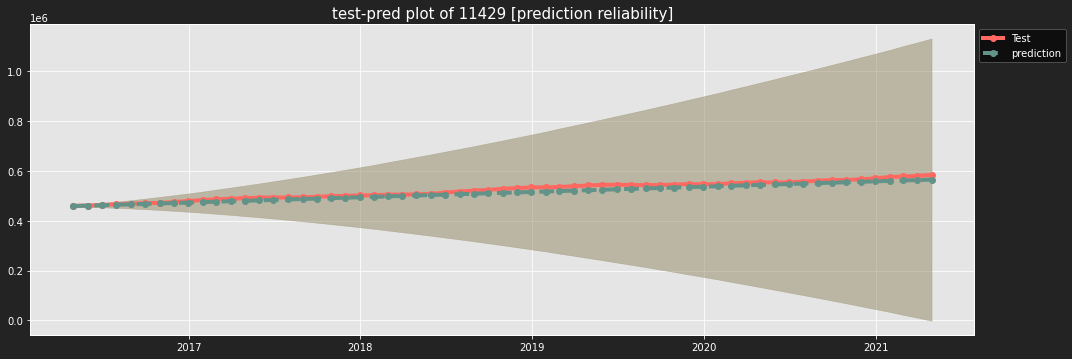

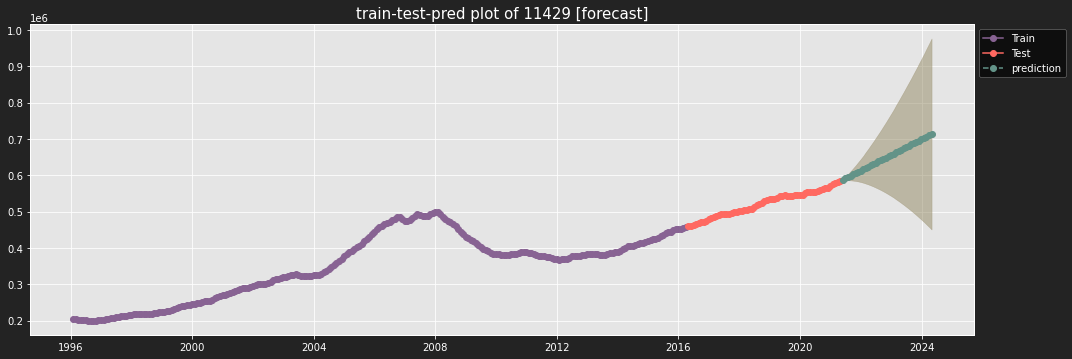

 Insights:


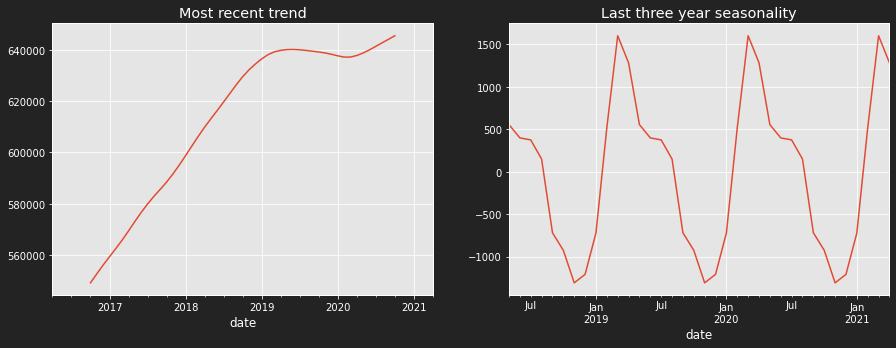

 Overall model performance and projected ROI:


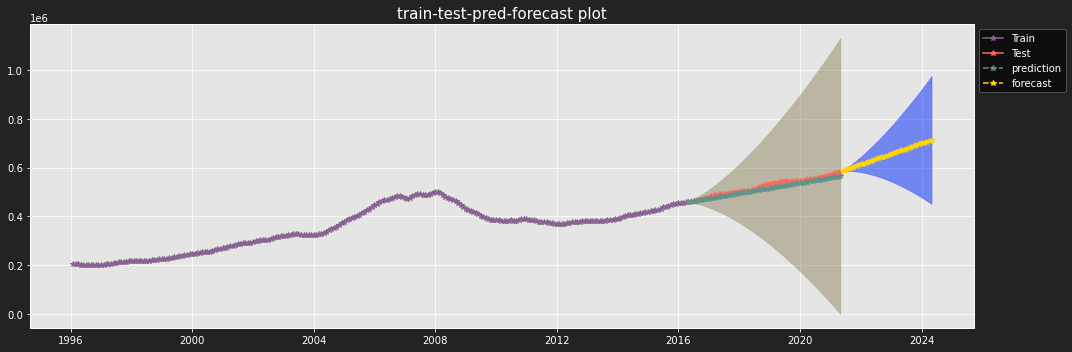

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11429                22.23  ...                 67.23                45.0

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11428                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 3)x(2, 0, [], 12)   Log Likelihood               -2108.363
Date:                             Sat, 19 Jun 2021   AIC                           4232.725
Time:                                     02:04:44   BIC                           4260.603
Sample:                                          0   HQIC                          4243.957
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.4917     40.570      0.431      0.666     -62.024      97.007
ar.L1          0.5195      

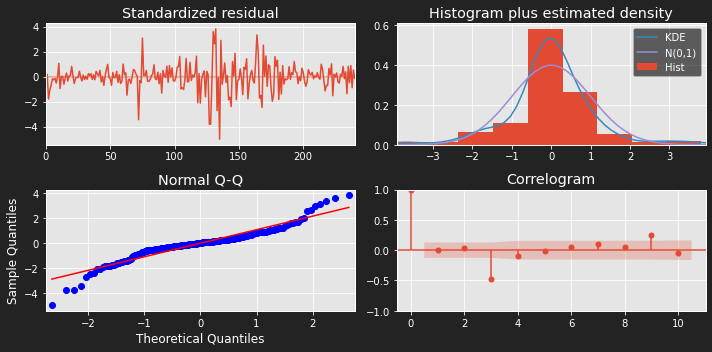

 Prediction:

Root Mean Squared Error of test and prediction: 21826.030233377074
Mean Squared Error: 476375595.7482901
Mean Absolute Error: 17786.74206469421


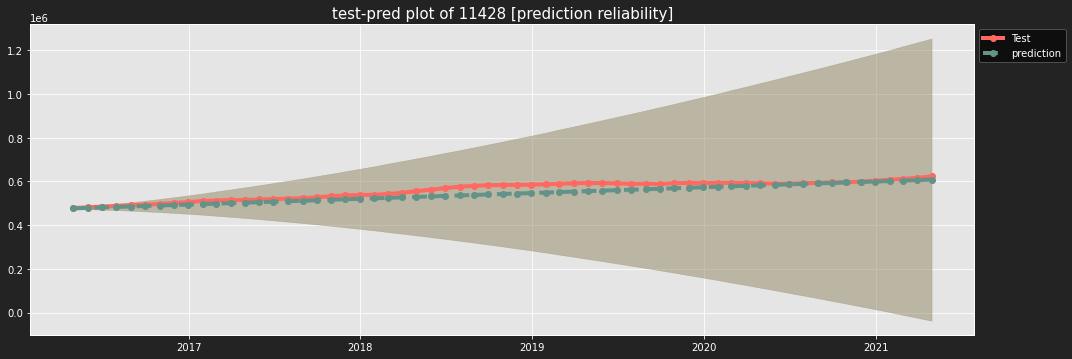

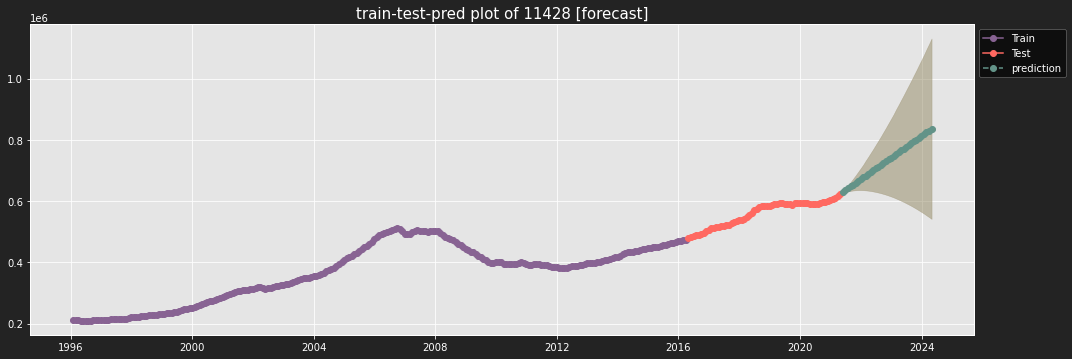

 Insights:


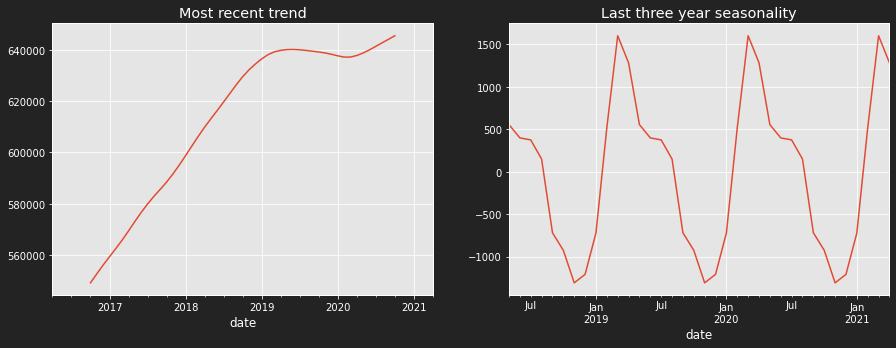

 Overall model performance and projected ROI:


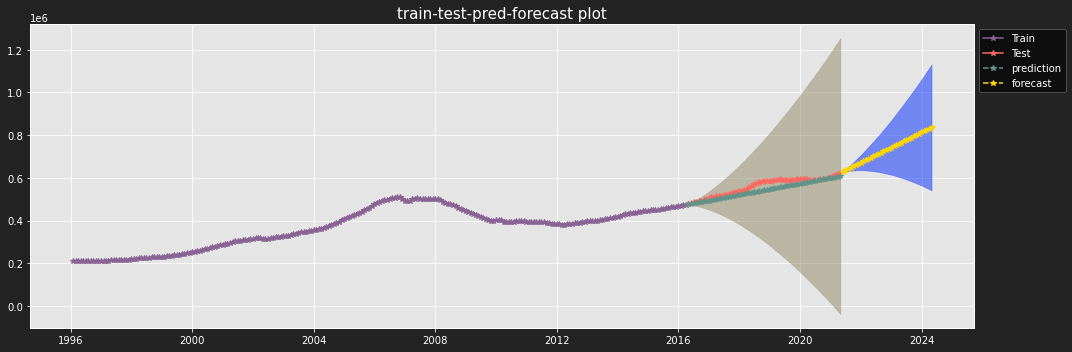

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11428                34.24  ...                 81.53               47.29

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11427                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(1, 0, 3, 12), suppress_warnings=True)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(1, 2, 3)x(1, 0, 3, 12)   Log Likelihood               -2086.555
Date:                            Sat, 19 Jun 2021   AIC                           4193.110
Time:                                    02:04:46   BIC                           4227.958
Sample:                                         0   HQIC                          4207.149
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.7728     64.474      0.183      0.855    -114.594     138.139
ar.L1          0.3847      0.545   

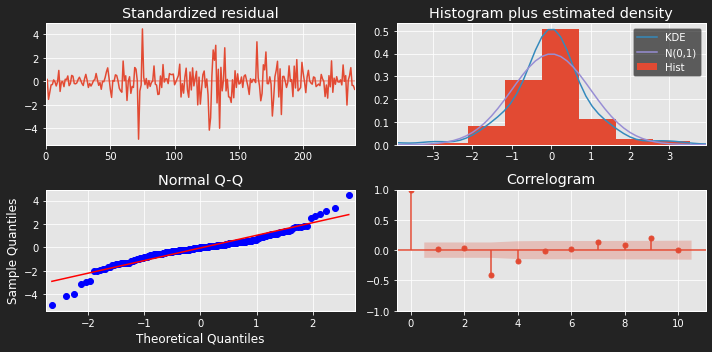

 Prediction:

Root Mean Squared Error of test and prediction: 32202.594484507394
Mean Squared Error: 1037007091.5336261
Mean Absolute Error: 29724.86353191206


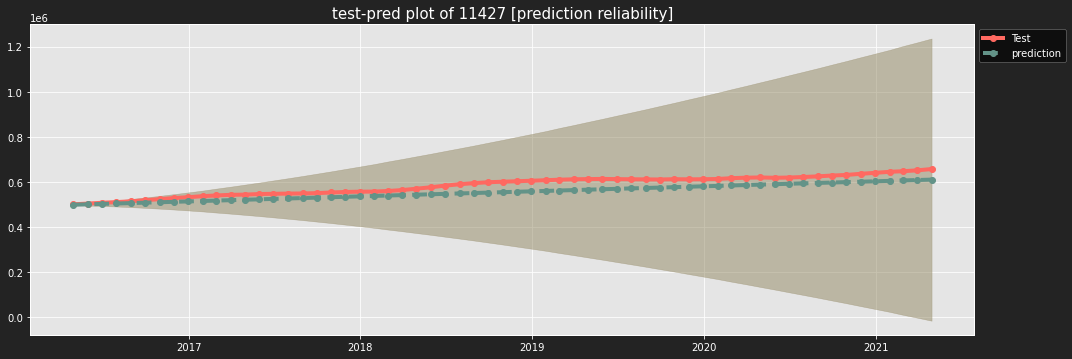

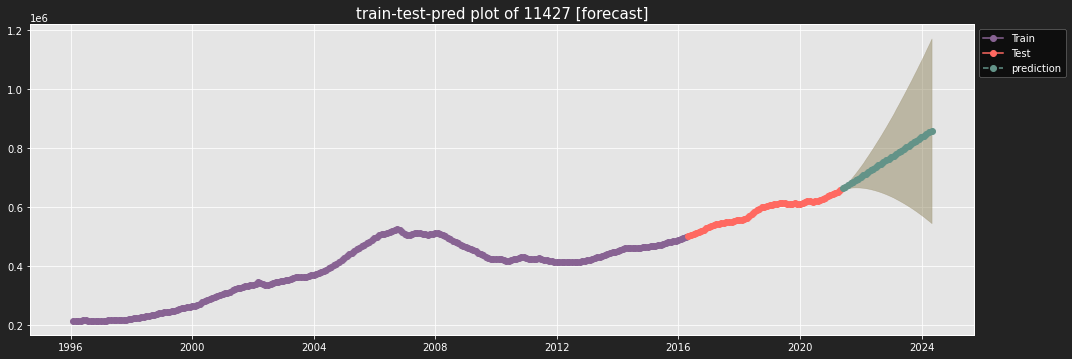

 Insights:


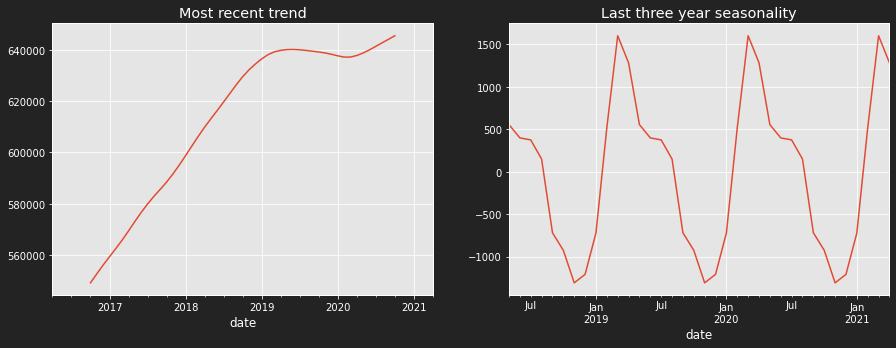

 Overall model performance and projected ROI:


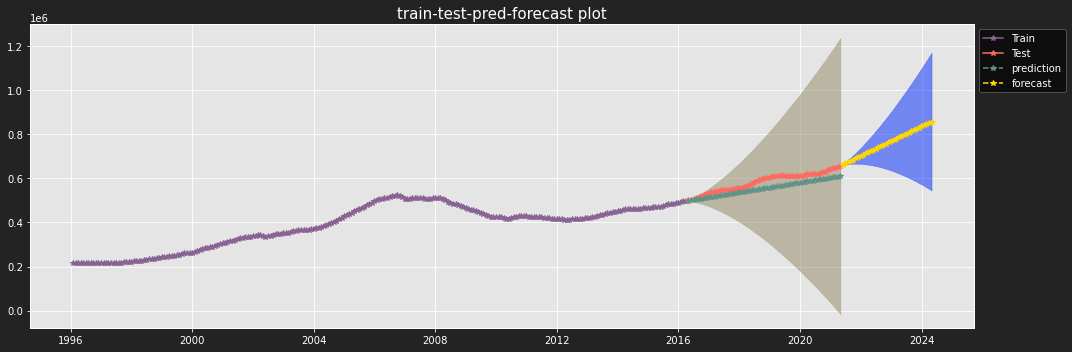

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11427                30.56  ...                 78.11               47.55

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11423                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(3, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 1, 12), suppress_warnings=True)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(3, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -2116.675
Date:                            Sat, 19 Jun 2021   AIC                           4247.351
Time:                                    02:04:48   BIC                           4271.744
Sample:                                         0   HQIC                          4257.178
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5646     37.425      0.309      0.757     -61.787      84.916
ar.L1          0.5965      0.314   

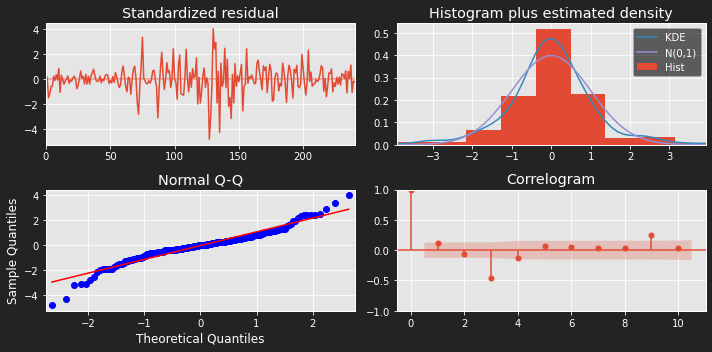

 Prediction:

Root Mean Squared Error of test and prediction: 31539.042281473074
Mean Squared Error: 994711188.0325463
Mean Absolute Error: 28175.240673024087


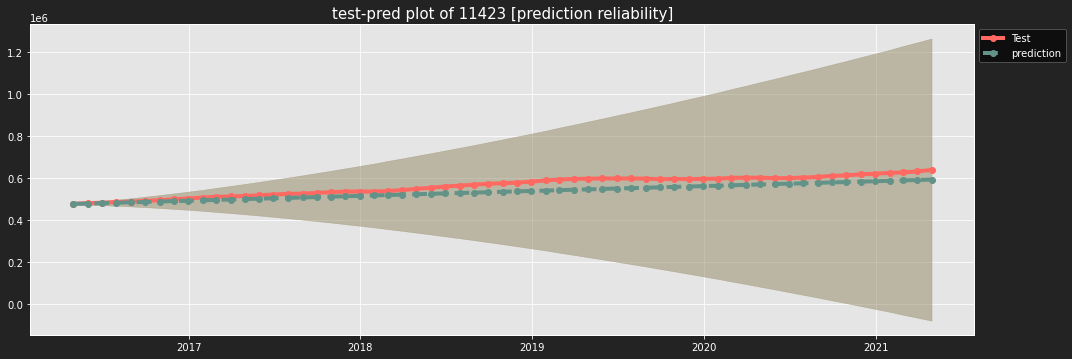

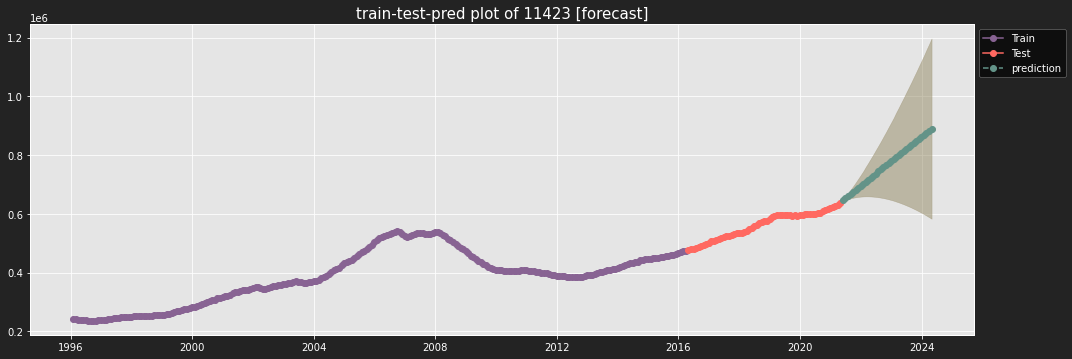

 Insights:


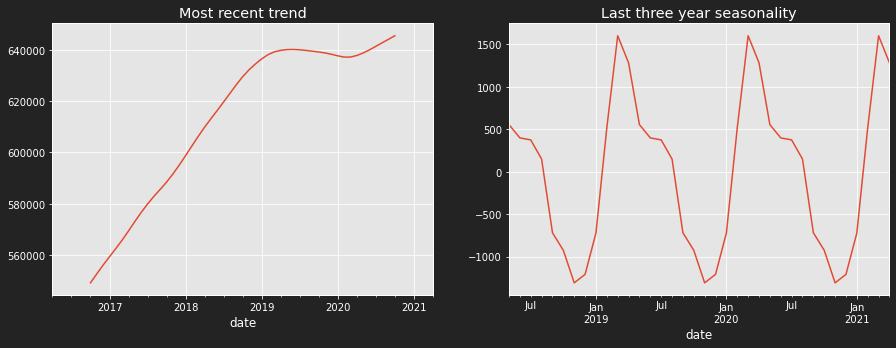

 Overall model performance and projected ROI:


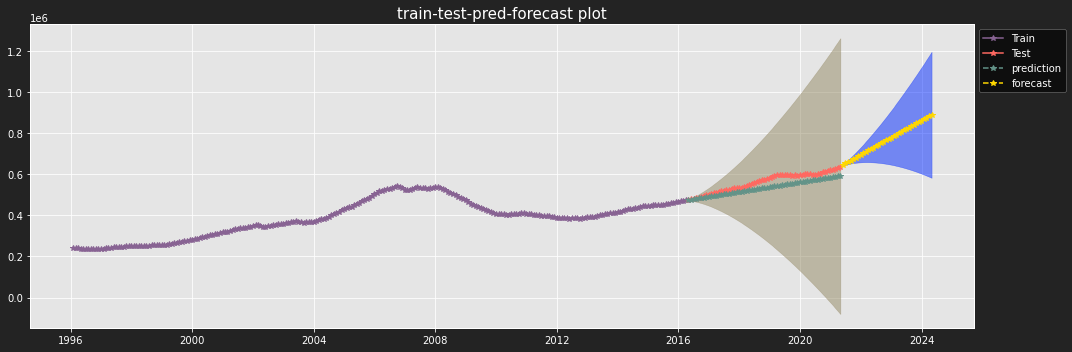

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11423                39.55  ...                 87.65               48.11

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11417                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 2), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 2)x(2, 0, [], 12)   Log Likelihood               -2108.641
Date:                             Sat, 19 Jun 2021   AIC                           4231.282
Time:                                     02:04:49   BIC                           4255.676
Sample:                                          0   HQIC                          4241.110
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6332     41.435      0.329      0.742     -67.579      94.845
ar.L1          0.7548      

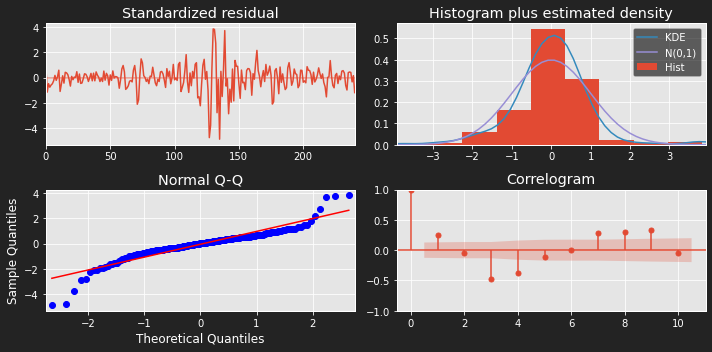

 Prediction:

Root Mean Squared Error of test and prediction: 35226.749342231175
Mean Squared Error: 1240923869.2203844
Mean Absolute Error: 31024.976622594542


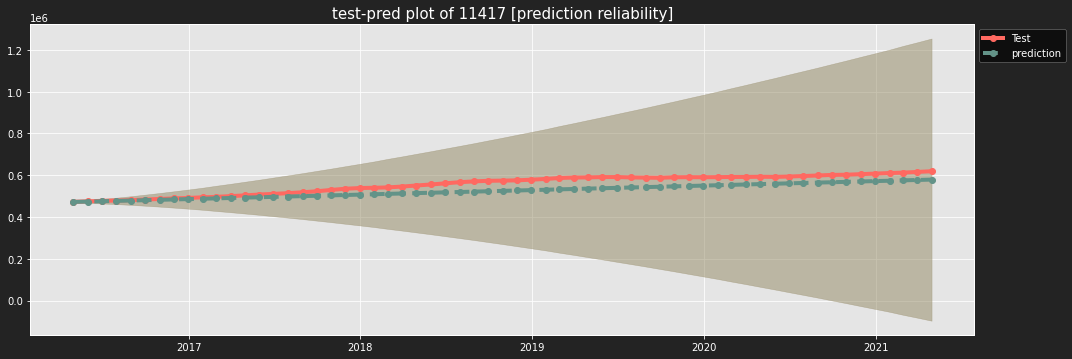

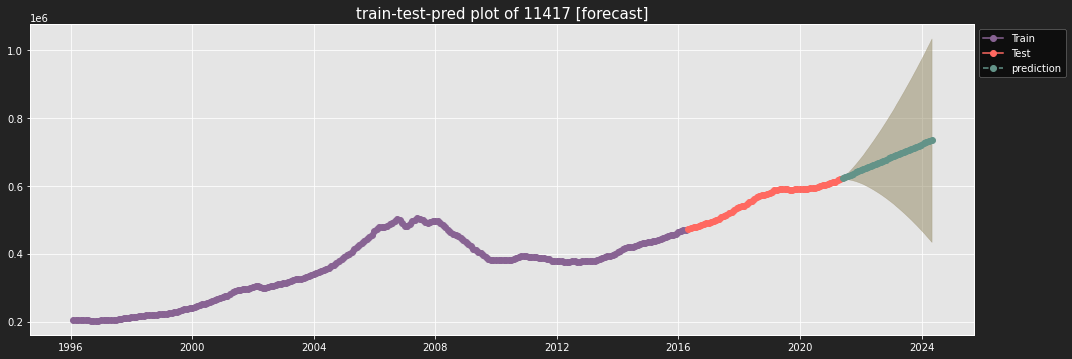

 Insights:


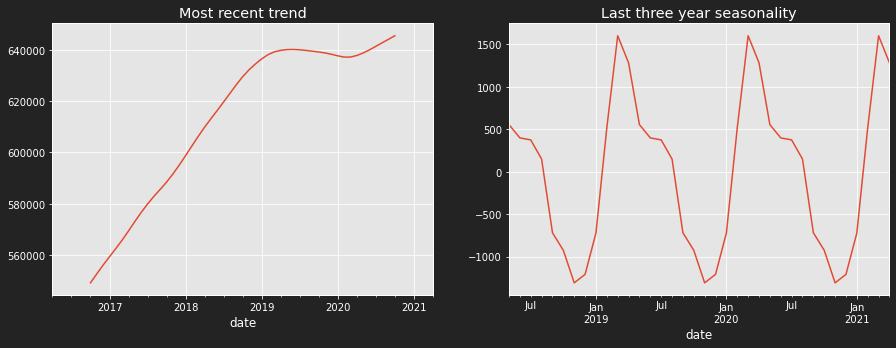

 Overall model performance and projected ROI:


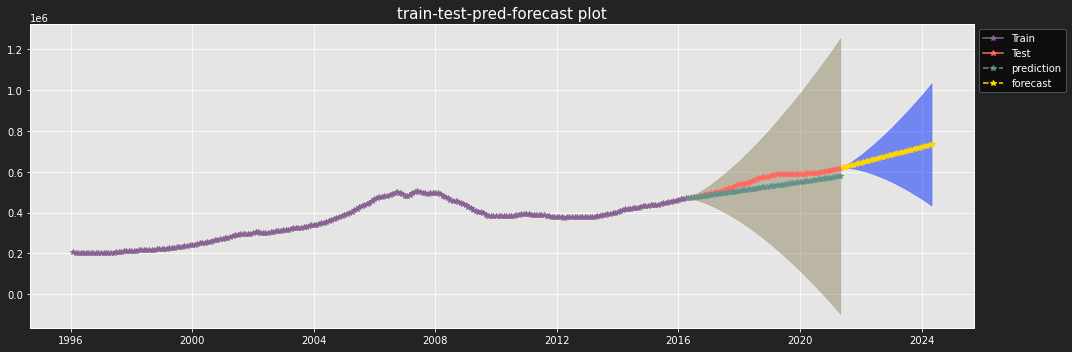

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11417                18.56  ...                 66.92               48.36

[1 rows x 5 columns]

In [40]:
fn.model_report(best_investments,
                results_,
                show_model_performance=True,
                show_train_fit=True,
                show_prediction=True,
                show_detailed_prediction=True)

### Visual

In [41]:
code_match = pd.read_csv('./data/nyc-zip-codes.txt')
# from : `https://github.com/erikgregorywebb/nyc-housing/blob/master/Data/nyc-zip-codes.csv`
code_match['ZipCode'] = code_match['ZipCode'].astype('str')
roi_viz = pd.merge(roi_, code_match, left_on='zipcode', right_on='ZipCode')
roi_viz.drop(columns=['Borough', 'ZipCode'], inplace=True)
# display(roi_viz)
roi_viz[roi_viz.columns.values[1:-1]] = roi_viz[
    roi_viz.columns.values[1:-1]].apply(lambda x: round(x * 100, 2), axis=1)
# roi_viz

In [92]:
# fn.map_zipcodes_return(roi_viz, plot_style='static')
# # Folium version
# fn.zip_code_map(roi_)

## High variance Zipcodes

In [15]:
# High variance
investigation = roi_.set_index('zipcode')[[
    'mean_forecasted_roi', 'std_forecasted_roi'
]].sort_values(by='mean_forecasted_roi')[:4].index
investigation

Index(['11415', '11375', '11101', '11354'], dtype='object', name='zipcode')

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11415                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -2003.765
Date:                Fri, 18 Jun 2021   AIC                           4017.531
Time:                        09:43:44   BIC                           4034.955
Sample:                             0   HQIC                          4024.551
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4475      0.250      1.788      0.074      -0.043       0.938
ma.L1         -0.4490      0.254     -1.768      0.077      -0.947       0.049
ma.L2         -0.0145      0.031     -0.469      0.6

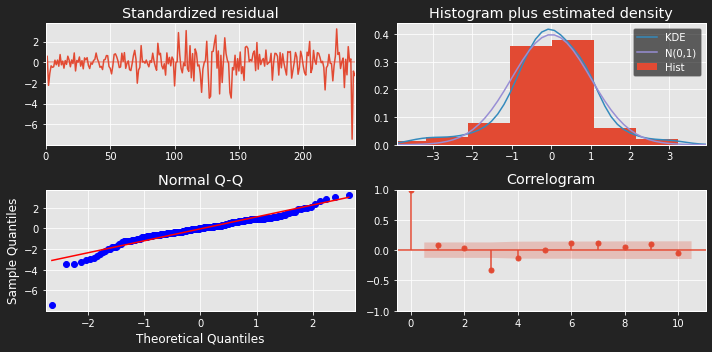

 Prediction:

Root Mean Squared Error of test and prediction: 222405.8425298457
Mean Squared Error: 49464358791.41052
Mean Absolute Error: 192689.9140215953


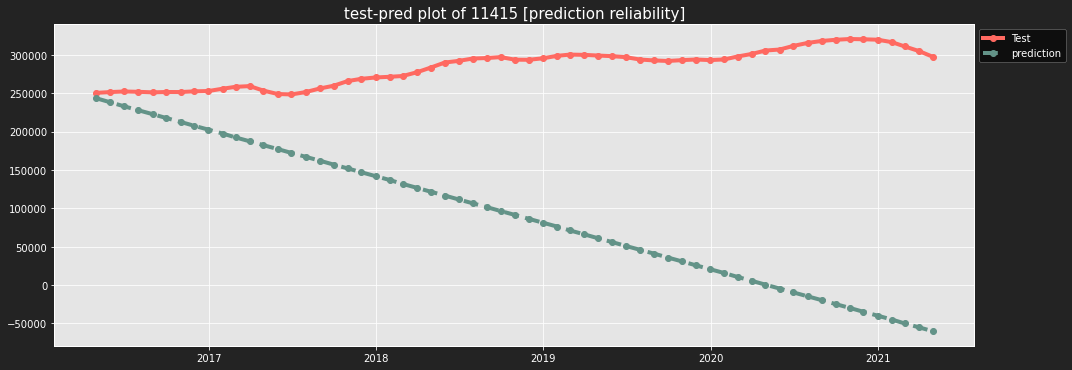

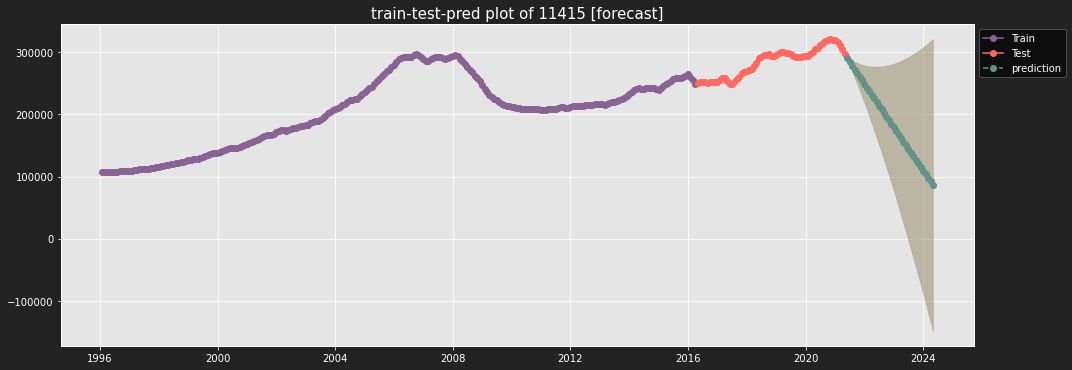

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11375                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 2, 0)   Log Likelihood               -2025.933
Date:                Fri, 18 Jun 2021   AIC                           4055.867
Time:                        09:43:45   BIC                           4062.837
Sample:                             0   HQIC                          4058.675
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0092      0.042     -0.218      0.827      -0.092       0.073
sigma2      1.175e+06   6.36e+04     18.479      0.000    1.05e+06     1.3e+06
Ljung-Box (L1) (Q):                   0.29   Jarque-

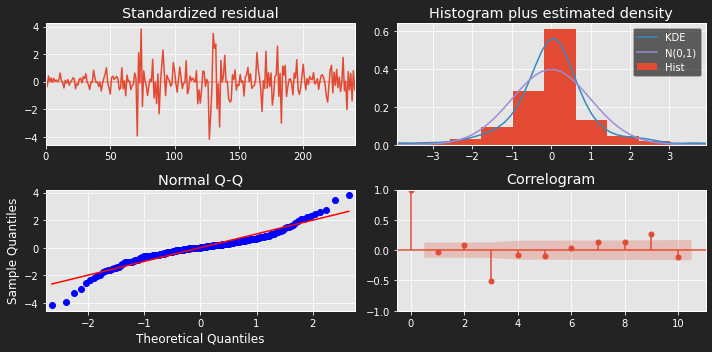

 Prediction:

Root Mean Squared Error of test and prediction: 47935.52415165556
Mean Squared Error: 2297814475.693954
Mean Absolute Error: 44126.14249132199


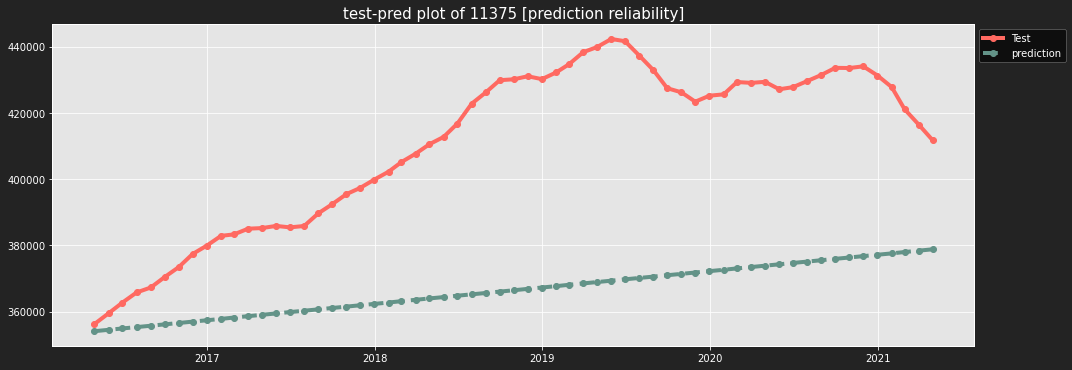

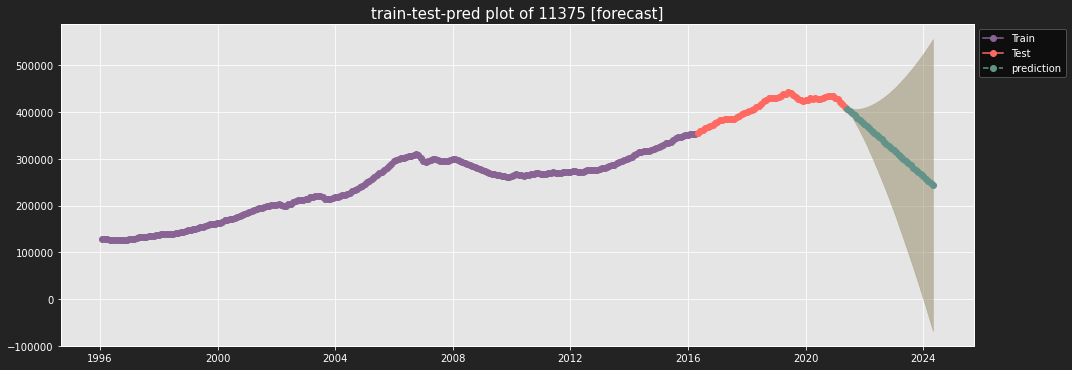

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11101                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(3, 0, 2, 12), suppress_warnings=True)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(1, 2, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -2233.012
Date:                                 Fri, 18 Jun 2021   AIC                           4482.024
Time:                                         09:43:46   BIC                           4509.902
Sample:                                              0   HQIC                          4493.255
                                                 - 243                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.2906   1399.221      0.016      0.987   -2720.132    2764

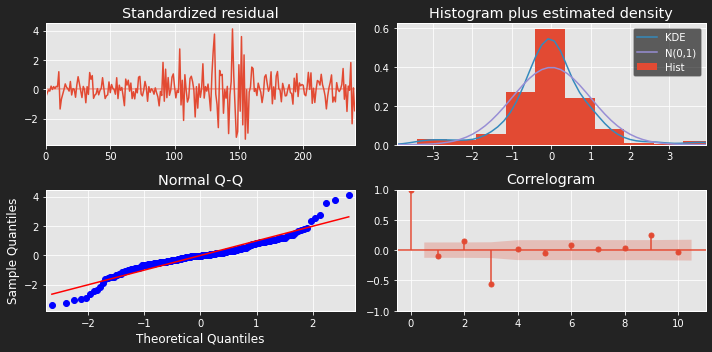

 Prediction:

Root Mean Squared Error of test and prediction: 48000.75378597782
Mean Squared Error: 2304072364.0220637
Mean Absolute Error: 45685.20620194418


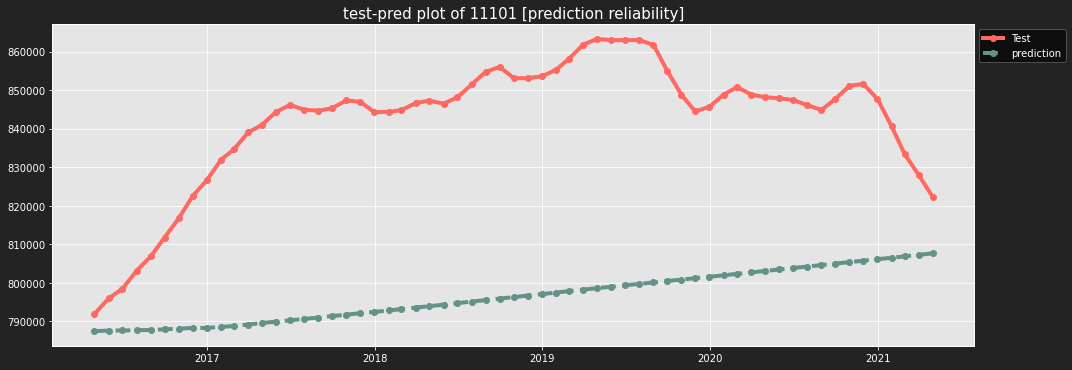

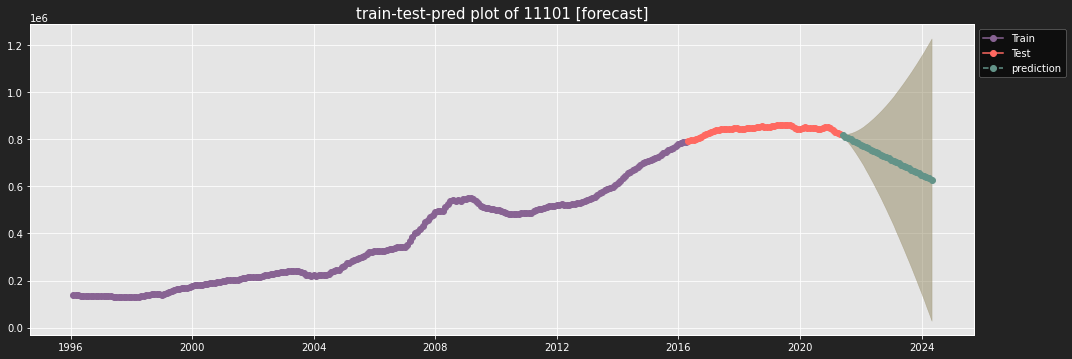

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11354                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 2, 12), suppress_warnings=True,
      with_intercept=False)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(1, 2, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1992.361
Date:                                 Fri, 18 Jun 2021   AIC                           3994.721
Time:                                         09:43:47   BIC                           4012.145
Sample:                                              0   HQIC                          4001.741
                                                 - 243                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8180      0.217      3.778      0.000       0.394       1

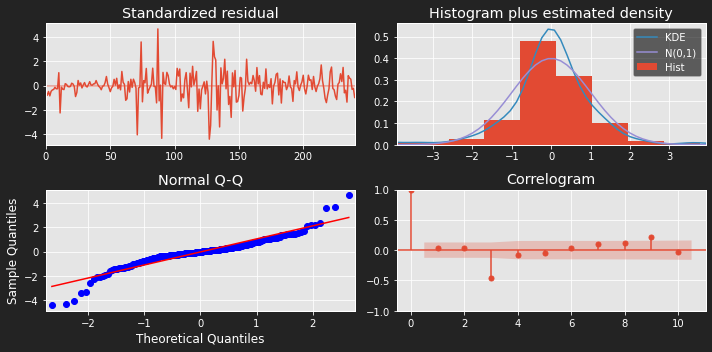

 Prediction:

Root Mean Squared Error of test and prediction: 20263.737033321657
Mean Squared Error: 410619038.55561155
Mean Absolute Error: 17275.420481853587


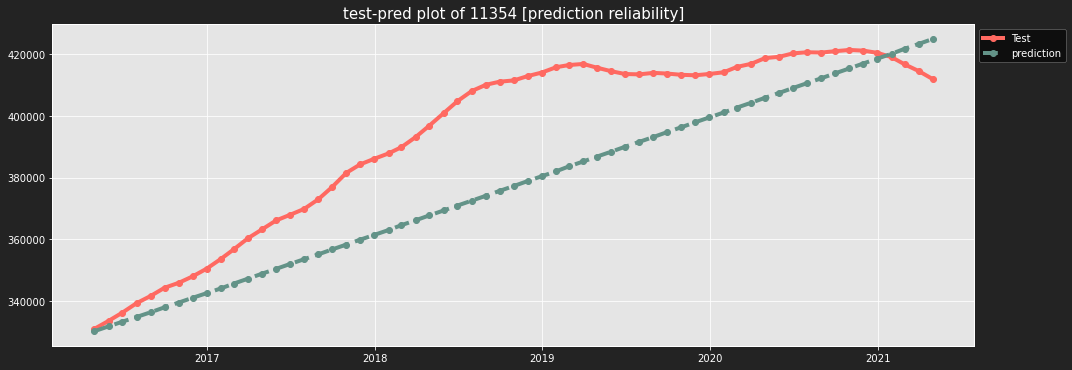

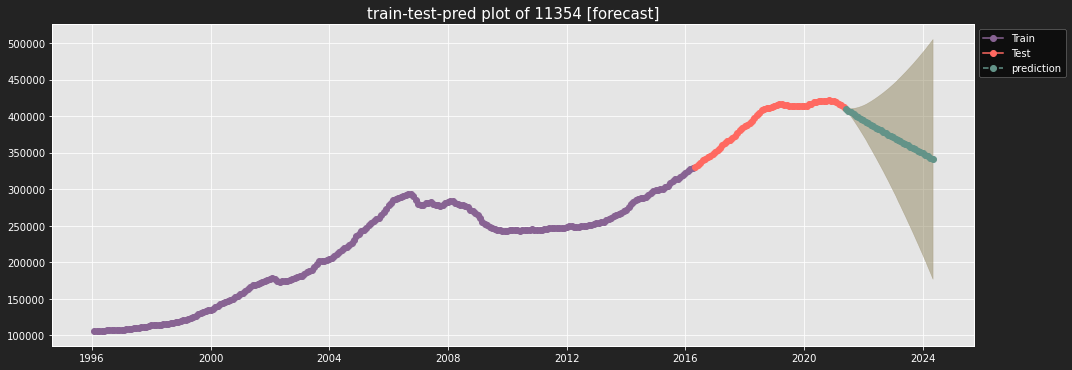

In [16]:
fn.model_report(investigation,
                results_,
                show_model_performance=True,
                show_train_fit=True,
                show_prediction=True,test_conf_int=False,
                show_detailed_prediction=False)

In [33]:
# zipcode_list = ['11432','11354']
# zipcode_list
fn.output_df(zipcode_list, results_)
# fn.output_df(best_investments, results_)

aic  ...  three_year_projected_upper_roi
ZipCode           ...                                
11375    4055.87  ...                           35.14
11377    3990.21  ...                           45.96
11355    4014.00  ...                           80.19
11385    4188.66  ...                           59.89
11373    3987.95  ...                           59.40
11372    4116.99  ...                           99.29
11101    4482.02  ...                           49.46
11368    4012.05  ...                           56.40
11354    3994.72  ...                           22.69
11374    3993.90  ...                           53.80
11434    4063.32  ...                          104.07
11691    4303.77  ...                           88.95
11432    4279.84  ...                           56.07
11435    4042.86  ...                           66.81
11103    4230.26  ...                           34.51
11365    4164.79  ...                           44.92
11367    3958.37  ...                           47.37
11357    4456.63  ...                           38.58
11364    4024.03  ...                           33.96
11358    4353.28  ...                           47.91
11104    4041.80  ...                           84.23
11379    4233.23  ...                           49.16
11413    4216.69  ...                           76.12
11420    4274.81  ...                           59.26
11414    4192.85  ...                           82.84
11412    4216.07  ...                           73.01
11361    4320.55  ...                           50.25
11378    4194.95  ...                           43.92
11421    4233.05  ...                           64.14
11419    4230.02  ...                           85.72
11433    4276.60  ...                           88.99
11360    4159.56  ...                           48.80
11418    4213.71  ...                           71.69
11415    4017.53  ...                            7.98
11423    4247.35  ...                           87.65
11369    4282.99  ...                           85.36
11694    4392.89  ...                           97.10
11422    4220.87  ...                           56.29
11417    4231.28  ...                           66.92
11427    4193.11  ...                           78.11
11692    4055.50  ...                          160.07
11370    4198.42  ...                           38.30
11356    4395.21  ...                           74.63
11429    4188.75  ...                           67.23
11362    4259.18  ...                           70.76
11411    4223.26  ...                           55.12
11426    4252.67  ...                           61.43
11428    4232.73  ...                           81.53
11693    4509.50  ...                           10.15
11004    4071.98  ...                          100.83
11416    4257.97  ...                           66.41
11436    4155.98  ...                           64.82
11366    4283.78  ...                           35.68
11363    4559.69  ...                          218.24
11430    4347.88  ...                           63.11

[55 rows x 12 columns]

## Under performing models

In [42]:
under_performing = fn.output_df(zipcode_list, results_)
under_performing['und_per_model'] = abs(under_performing.test_roi - under_performing.pred_roi)

In [45]:
under_performing.sort_values(by='und_per_model')[-8:]

aic      bic  ...  three_year_projected_upper_roi  und_per_model
ZipCode                    ...                                               
11101    4482.02  4509.90  ...                           49.46          20.03
11354    3994.72  4012.15  ...                           22.69          20.43
11428    4232.73  4260.60  ...                           81.53          20.72
11423    4247.35  4271.74  ...                           87.65          21.34
11693    4509.50  4516.48  ...                           10.15          23.09
11375    4055.87  4062.84  ...                           35.14          40.40
11104    4041.80  4055.73  ...                           84.23          42.01
11415    4017.53  4034.95  ...                            7.98          75.36

[8 rows x 13 columns]

In [50]:
und_per_model = under_performing.sort_values(by='und_per_model')[-8:].index

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11101                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(3, 0, 2, 12), suppress_warnings=True)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(1, 2, 0)x(3, 0, [1, 2], 12)   Log Likelihood               -2233.012
Date:                                 Fri, 18 Jun 2021   AIC                           4482.024
Time:                                         10:15:46   BIC                           4509.902
Sample:                                              0   HQIC                          4493.255
                                                 - 243                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.2906   1399.221      0.016      0.987   -2720.132    2764

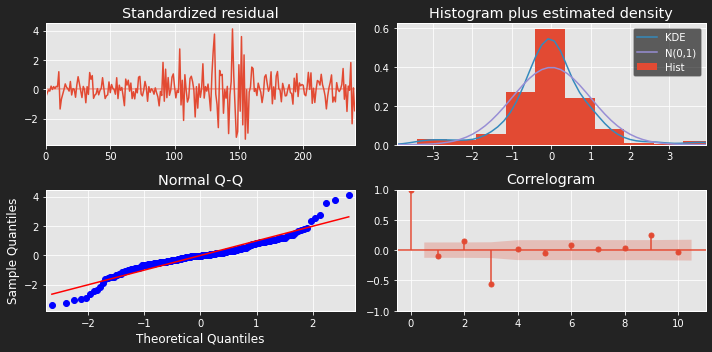

 Prediction:

Root Mean Squared Error of test and prediction: 48000.75378597782
Mean Squared Error: 2304072364.0220637
Mean Absolute Error: 45685.20620194418


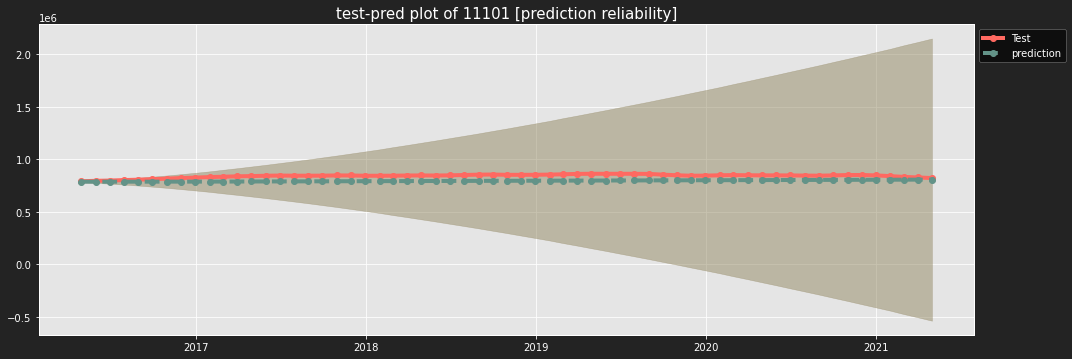

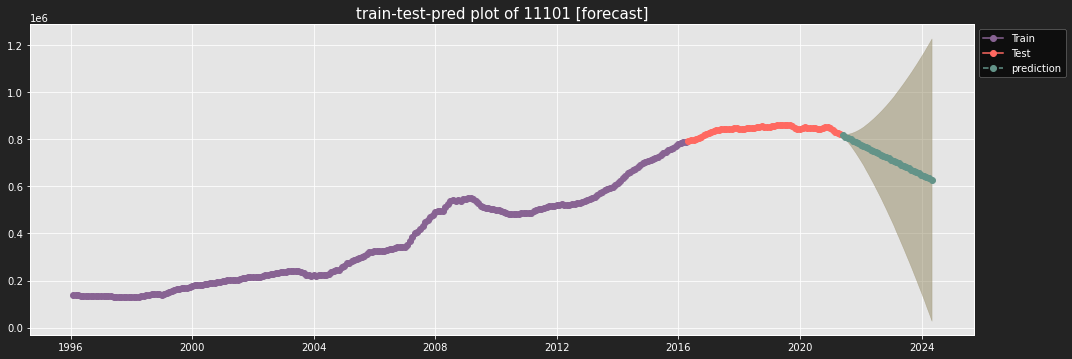

 Insights:


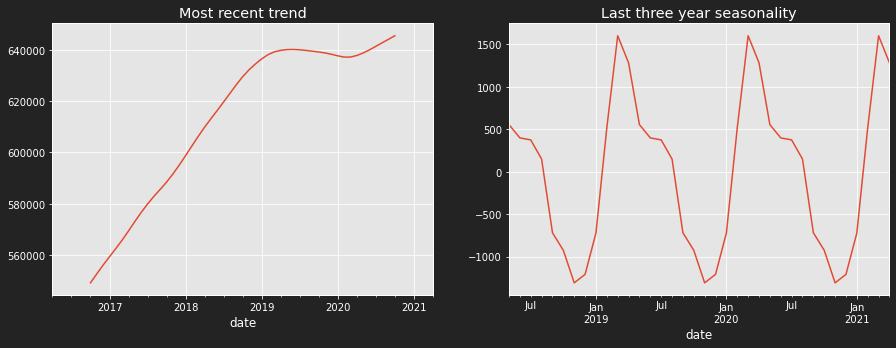

 Overall model performance and projected ROI:


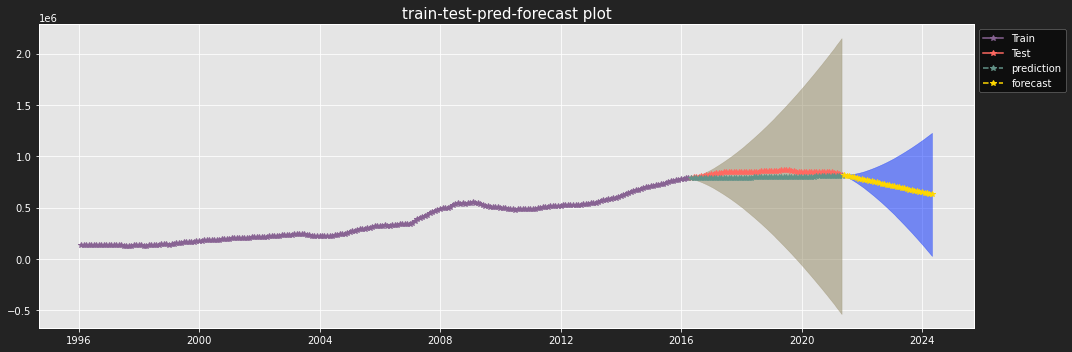

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11101               -23.49  ...                 49.46               72.95

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11354                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 2, 12), suppress_warnings=True,
      with_intercept=False)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(1, 2, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1992.361
Date:                                 Fri, 18 Jun 2021   AIC                           3994.721
Time:                                         10:15:47   BIC                           4012.145
Sample:                                              0   HQIC                          4001.741
                                                 - 243                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8180      0.217      3.778      0.000       0.394       1

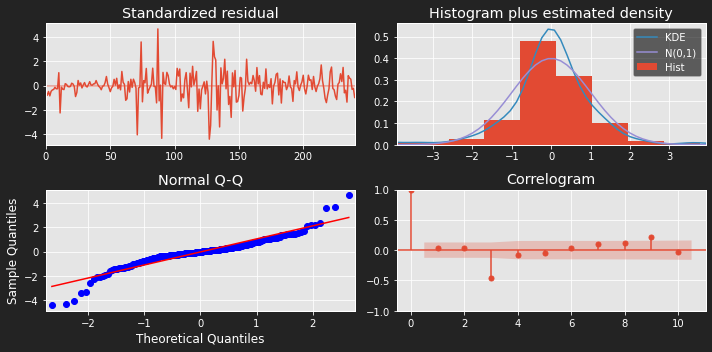

 Prediction:

Root Mean Squared Error of test and prediction: 20263.737033321657
Mean Squared Error: 410619038.55561155
Mean Absolute Error: 17275.420481853587


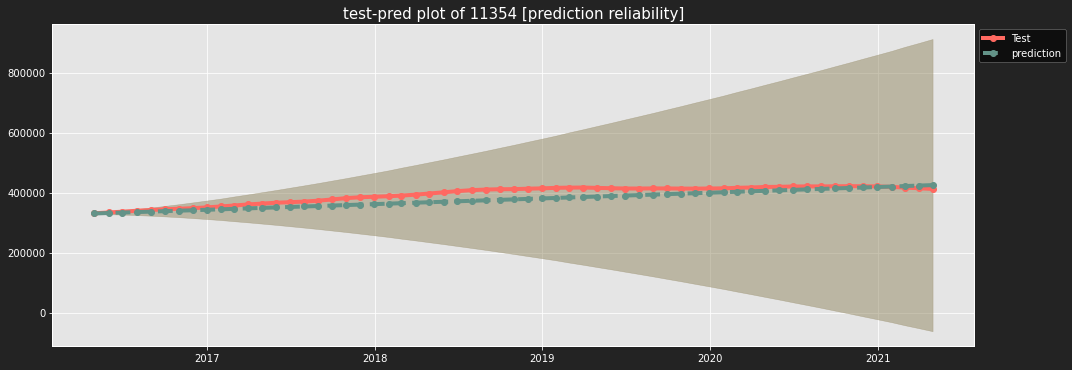

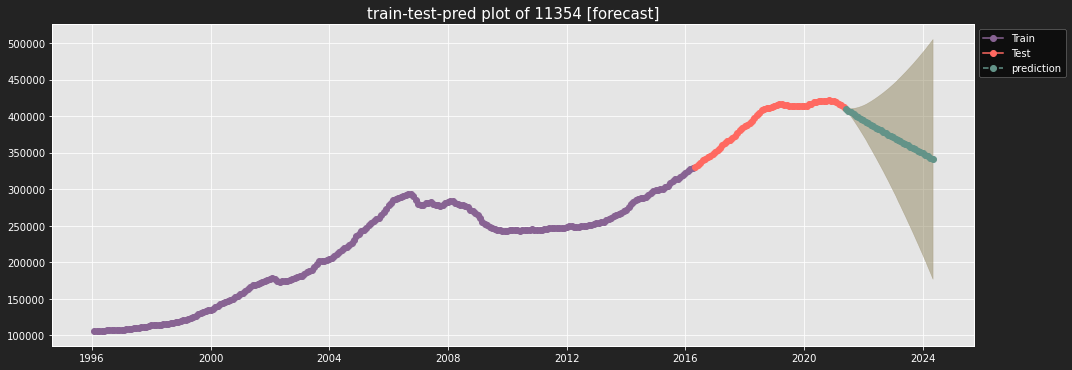

 Insights:


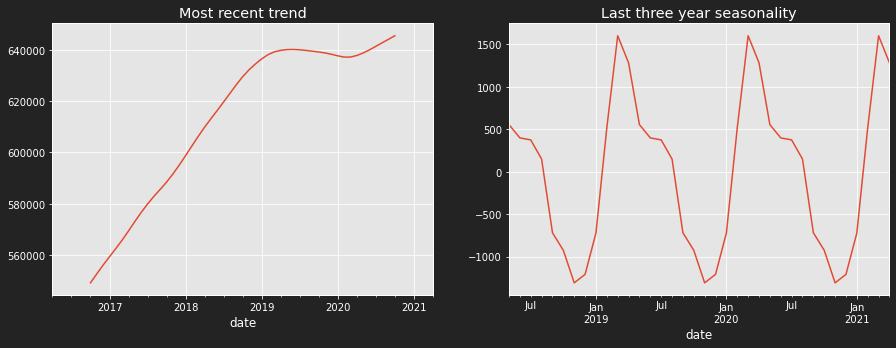

 Overall model performance and projected ROI:


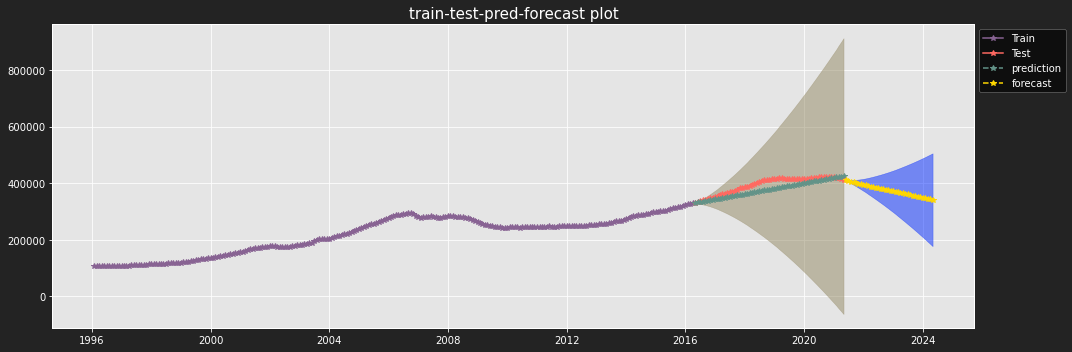

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11354               -17.11  ...                 22.69                39.8

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11428                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  243
Model:             SARIMAX(1, 2, 3)x(2, 0, [], 12)   Log Likelihood               -2108.363
Date:                             Fri, 18 Jun 2021   AIC                           4232.725
Time:                                     10:15:49   BIC                           4260.603
Sample:                                          0   HQIC                          4243.957
                                             - 243                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.4917     40.570      0.431      0.666     -62.024      97.007
ar.L1          0.5195      

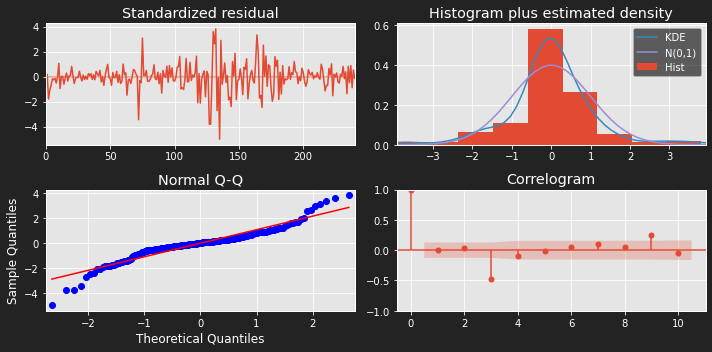

 Prediction:

Root Mean Squared Error of test and prediction: 21826.030233377074
Mean Squared Error: 476375595.7482901
Mean Absolute Error: 17786.74206469421


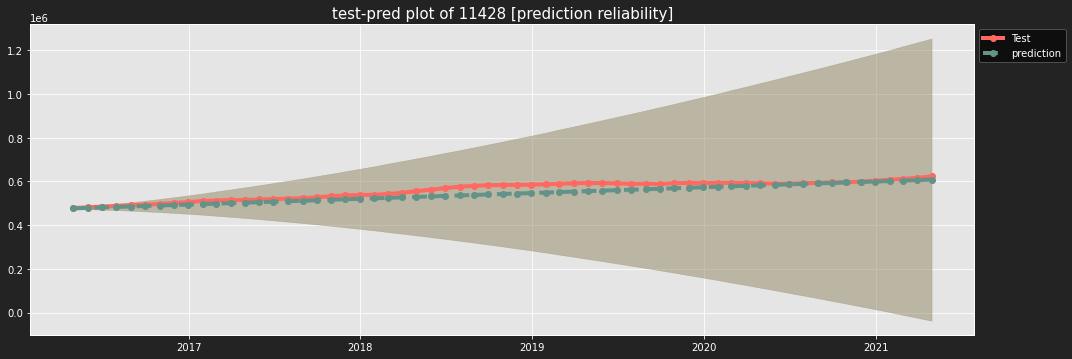

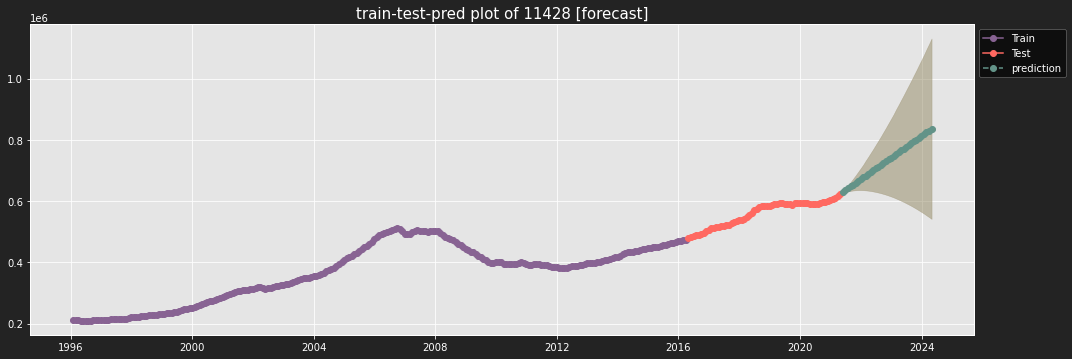

 Insights:


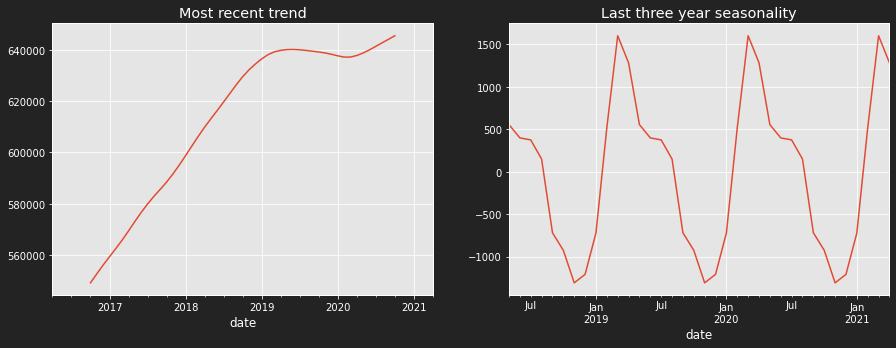

 Overall model performance and projected ROI:


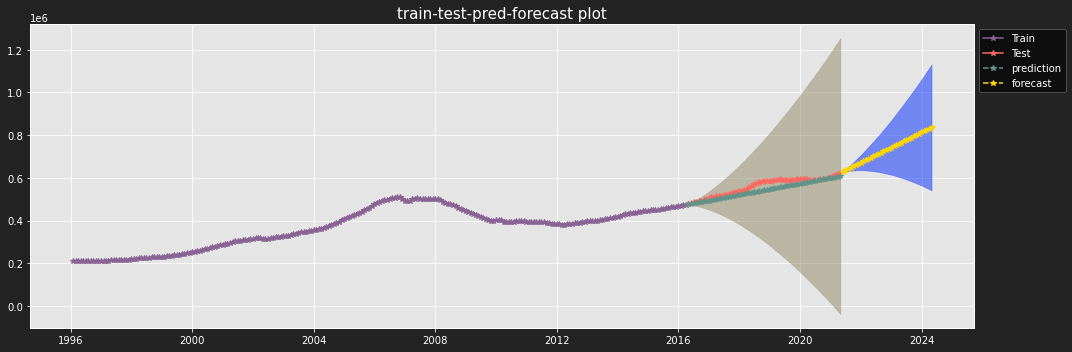

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11428                34.24  ...                 81.53               47.29

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11423                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(3, 2, 1), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 1, 12), suppress_warnings=True)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(3, 2, 1)x(0, 0, 1, 12)   Log Likelihood               -2116.675
Date:                            Fri, 18 Jun 2021   AIC                           4247.351
Time:                                    10:15:50   BIC                           4271.744
Sample:                                         0   HQIC                          4257.178
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5646     37.425      0.309      0.757     -61.787      84.916
ar.L1          0.5965      0.314   

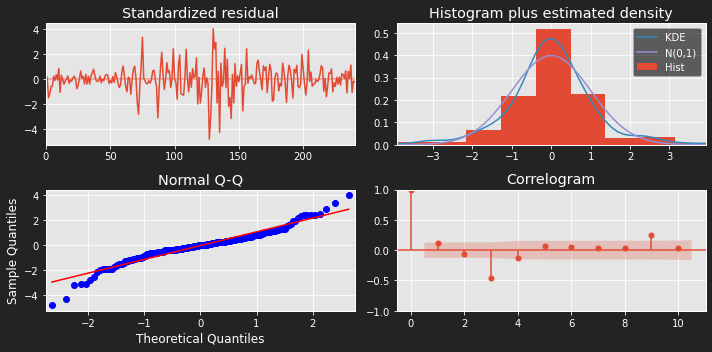

 Prediction:

Root Mean Squared Error of test and prediction: 31539.042281473074
Mean Squared Error: 994711188.0325463
Mean Absolute Error: 28175.240673024087


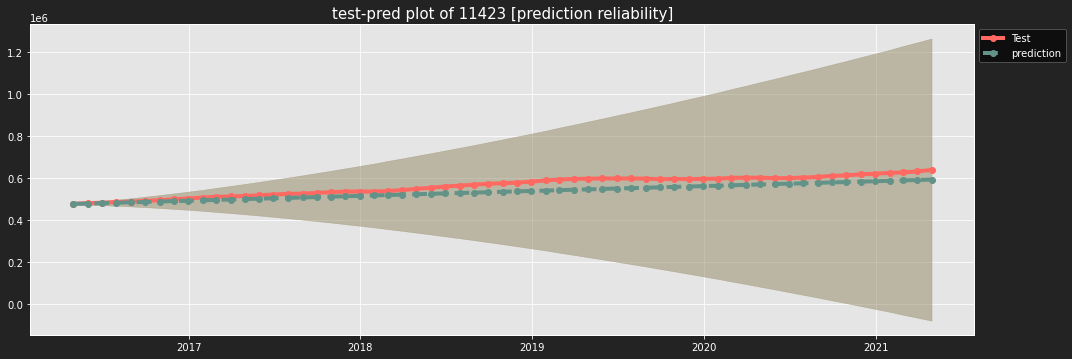

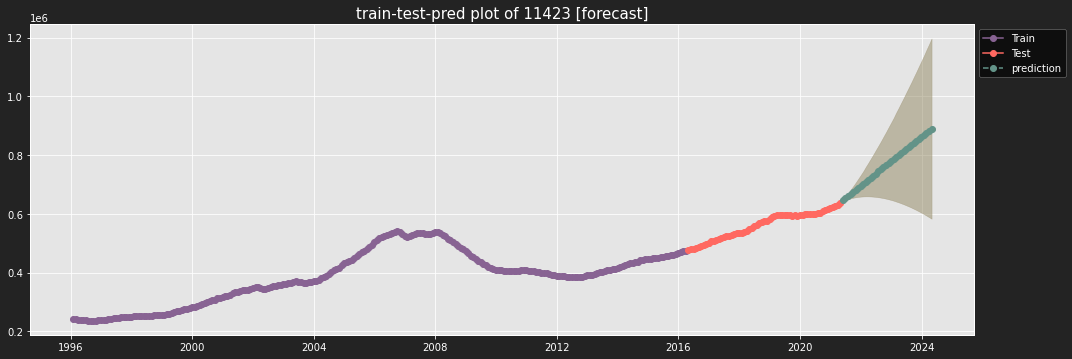

 Insights:


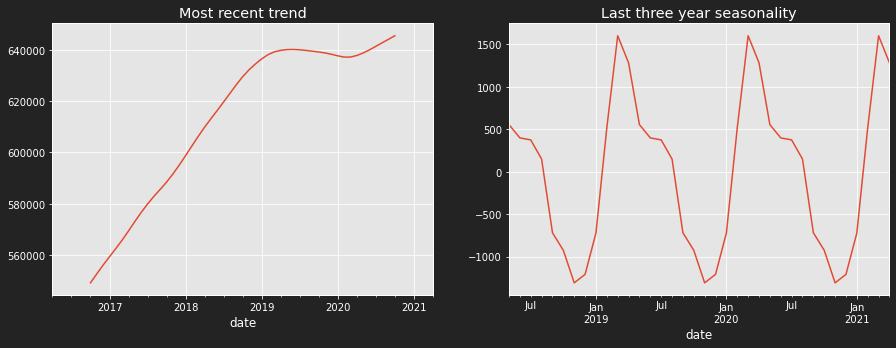

 Overall model performance and projected ROI:


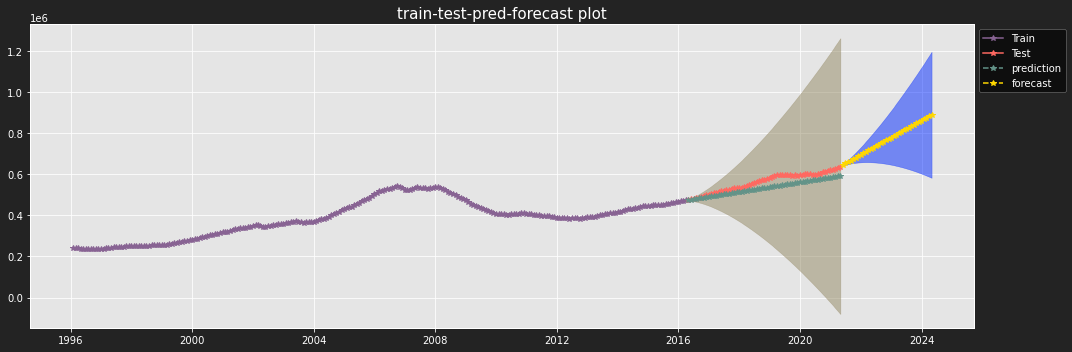

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11423                39.55  ...                 87.65               48.11

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11693                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(0, 1, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2252.749
Date:                Fri, 18 Jun 2021   AIC                           4509.499
Time:                        10:15:52   BIC                           4516.477
Sample:                             0   HQIC                          4512.310
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    649.6043    181.926      3.571      0.000     293.035    1006.173
sigma2      7.222e+06    5.7e+05     12.676      0.000    6.11e+06    8.34e+06
Ljung-Box (L1) (Q):                 130.57   Jarque-

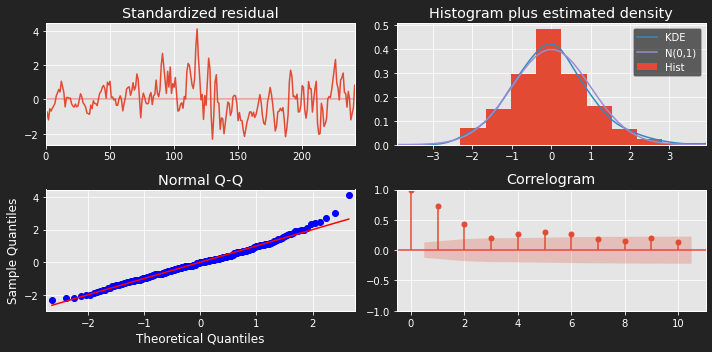

 Prediction:

Root Mean Squared Error of test and prediction: 33917.68629186611
Mean Squared Error: 1150409443.3934426
Mean Absolute Error: 27405.196721311477


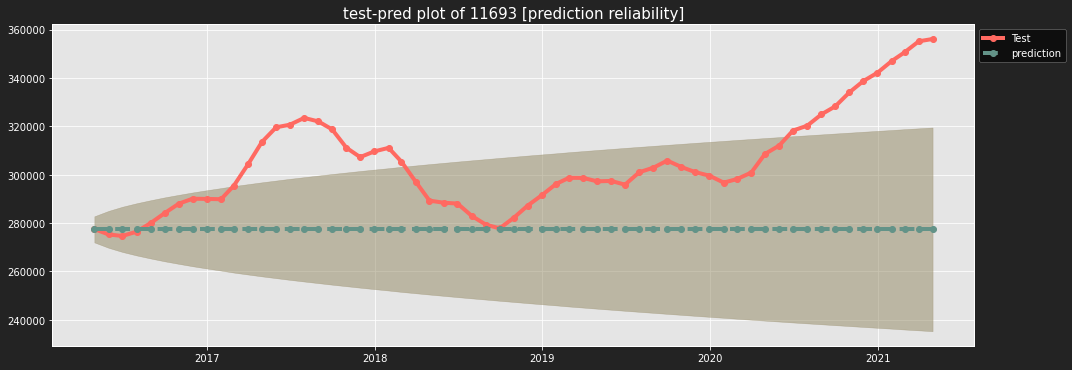

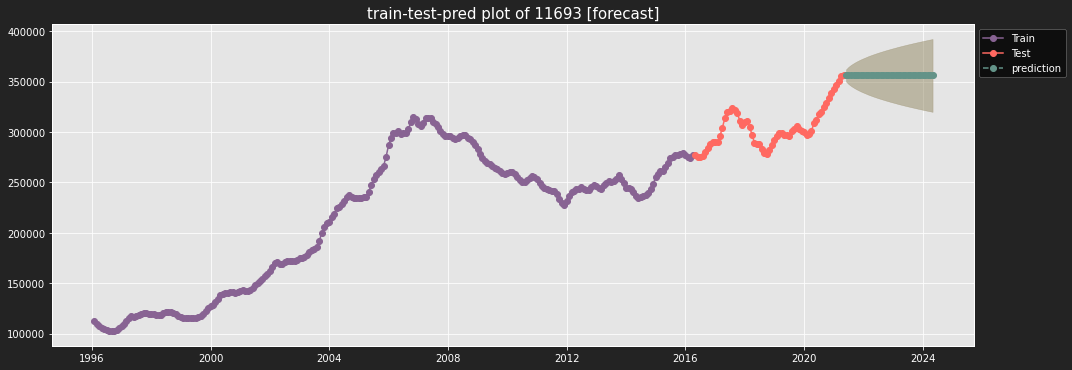

 Insights:


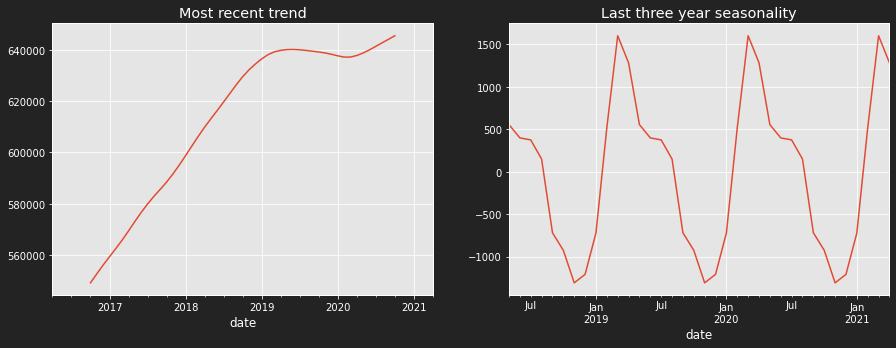

 Overall model performance and projected ROI:


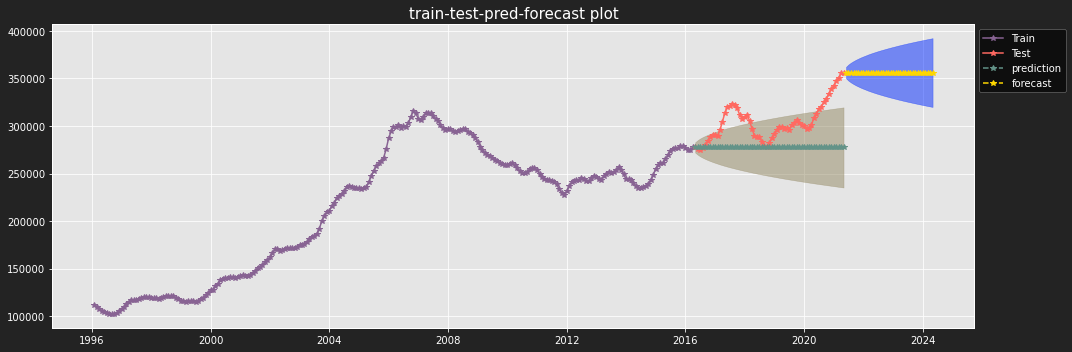

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11693                  0.0  ...                 10.15               10.15

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11375                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 2, 0)   Log Likelihood               -2025.933
Date:                Fri, 18 Jun 2021   AIC                           4055.867
Time:                        10:15:53   BIC                           4062.837
Sample:                             0   HQIC                          4058.675
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0092      0.042     -0.218      0.827      -0.092       0.073
sigma2      1.175e+06   6.36e+04     18.479      0.000    1.05e+06     1.3e+06
Ljung-Box (L1) (Q):                   0.29   Jarque-

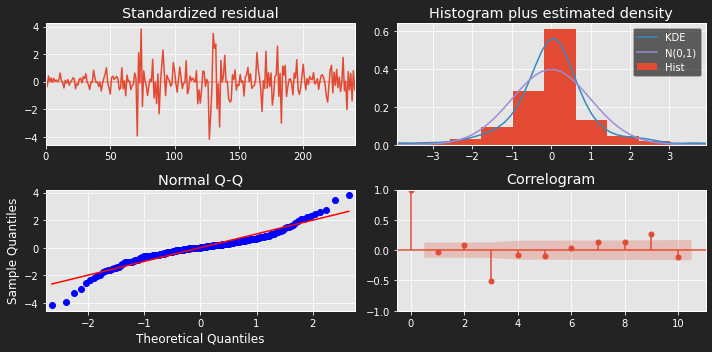

 Prediction:

Root Mean Squared Error of test and prediction: 47935.52415165556
Mean Squared Error: 2297814475.693954
Mean Absolute Error: 44126.14249132199


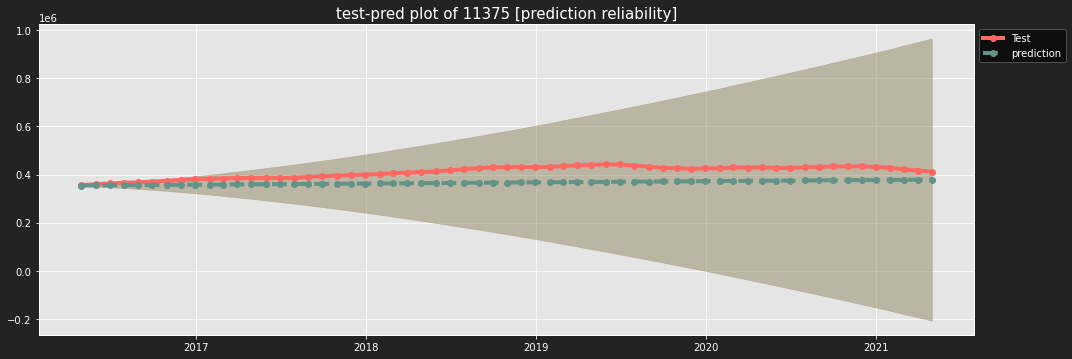

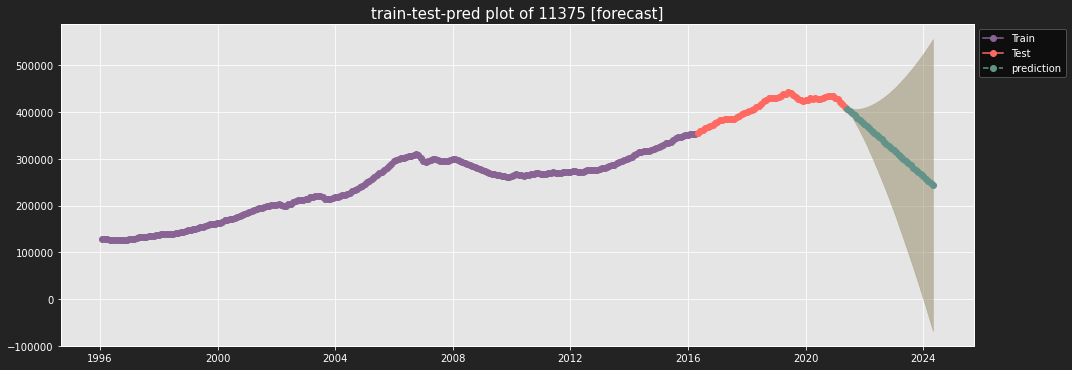

 Insights:


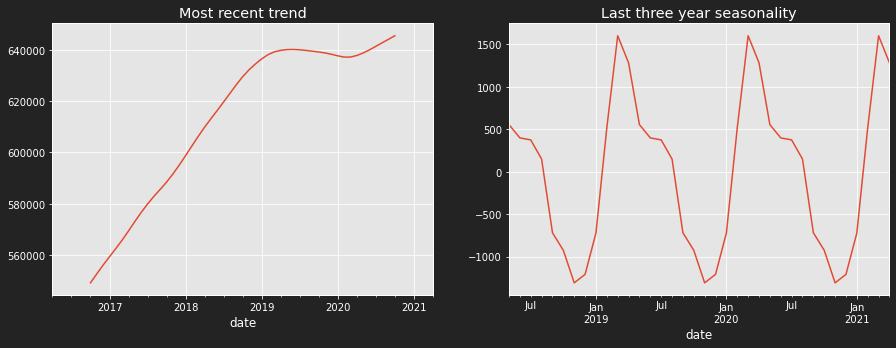

 Overall model performance and projected ROI:


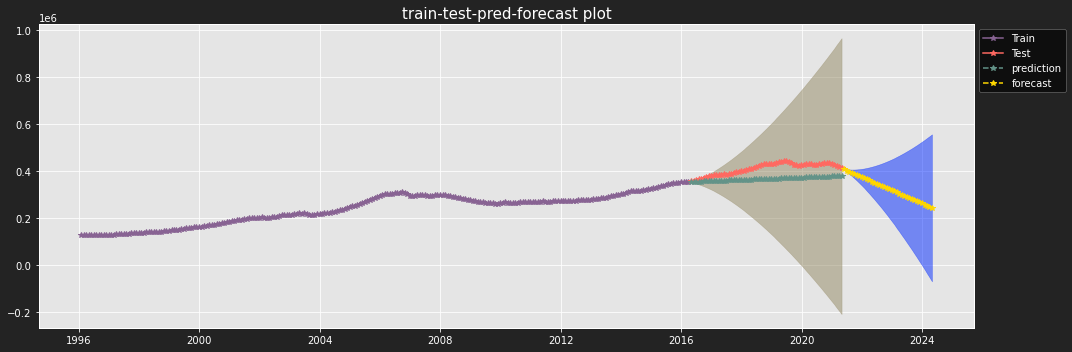

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11375               -40.78  ...                 35.14               75.92

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11104                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(0, 2, 0), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 2, 12), suppress_warnings=True)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  243
Model:             SARIMAX(0, 2, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2016.898
Date:                                 Fri, 18 Jun 2021   AIC                           4041.795
Time:                                         10:15:55   BIC                           4055.734
Sample:                                              0   HQIC                          4047.411
                                                 - 243                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4236     64.715      0.099      0.921    -120.416     133

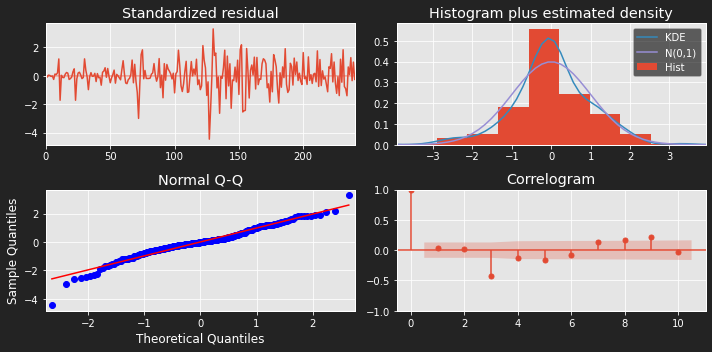

 Prediction:

Root Mean Squared Error of test and prediction: 31972.81205732297
Mean Squared Error: 1022260710.8528973
Mean Absolute Error: 25470.88689787593


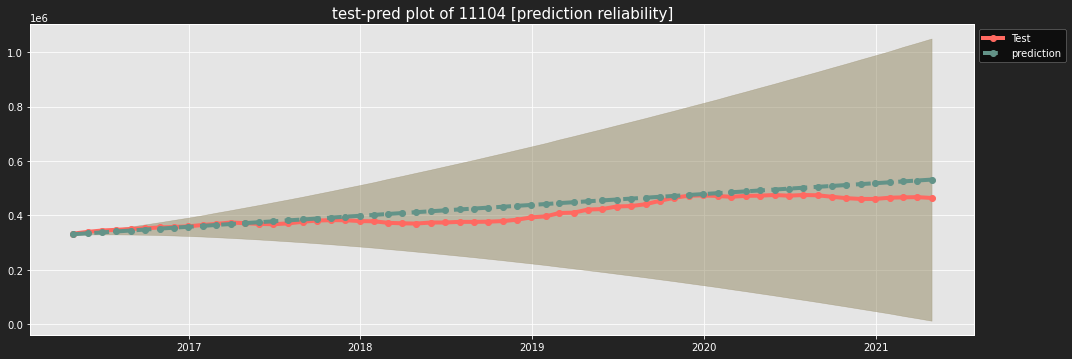

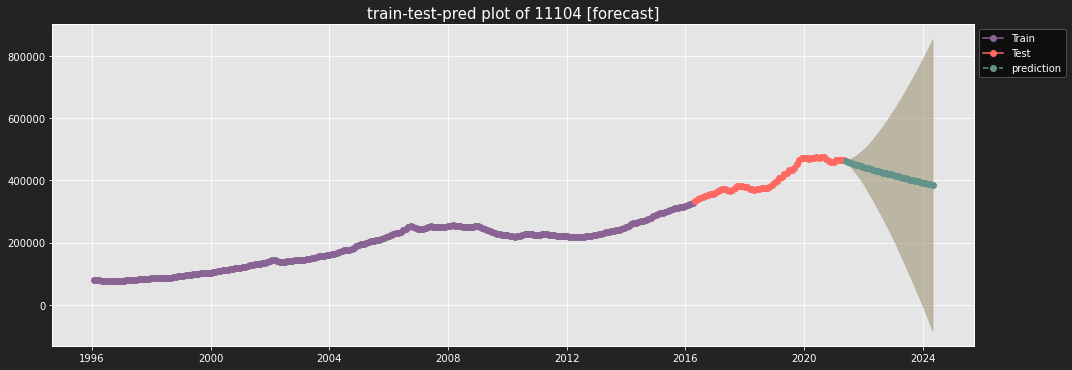

 Insights:


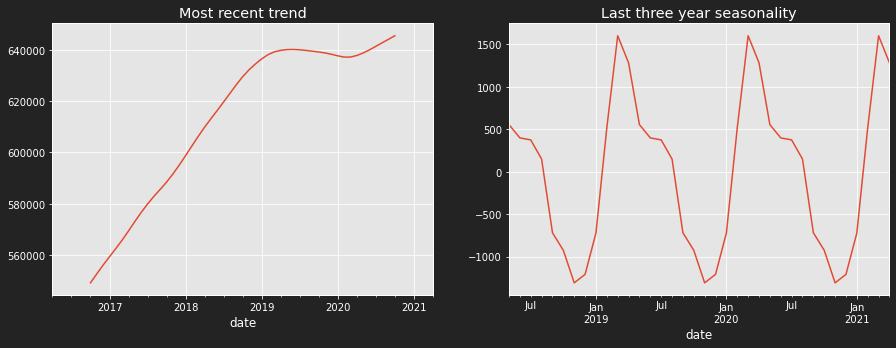

 Overall model performance and projected ROI:


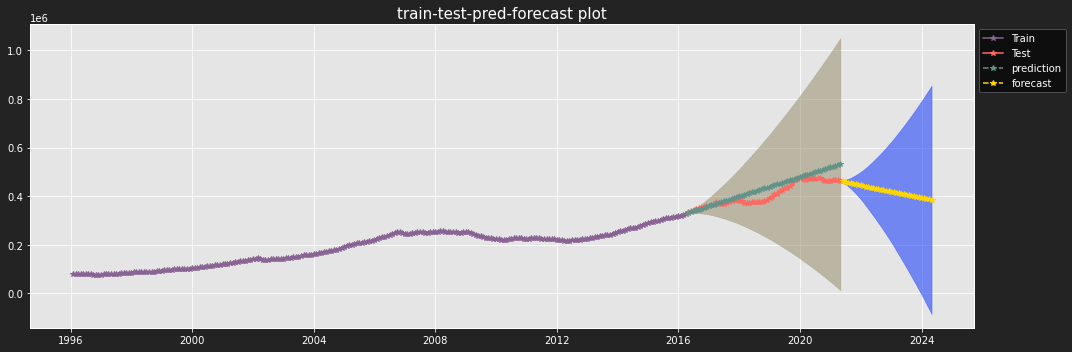

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11104               -17.07  ...                 84.23               101.3

[1 rows x 5 columns]

-------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Report of 11415                                                                      
-------------------------------------------------------------------------------------------------------------------------------------------------------------
 Model Used:


ARIMA(order=(1, 2, 3), out_of_sample_size=12, scoring_args={},
      seasonal_order=(0, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(1, 2, 3)   Log Likelihood               -2003.765
Date:                Fri, 18 Jun 2021   AIC                           4017.531
Time:                        10:15:57   BIC                           4034.955
Sample:                             0   HQIC                          4024.551
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4475      0.250      1.788      0.074      -0.043       0.938
ma.L1         -0.4490      0.254     -1.768      0.077      -0.947       0.049
ma.L2         -0.0145      0.031     -0.469      0.6

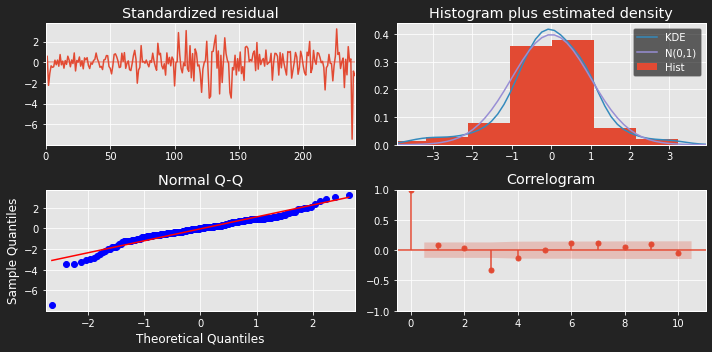

 Prediction:

Root Mean Squared Error of test and prediction: 222405.8425298457
Mean Squared Error: 49464358791.41052
Mean Absolute Error: 192689.9140215953


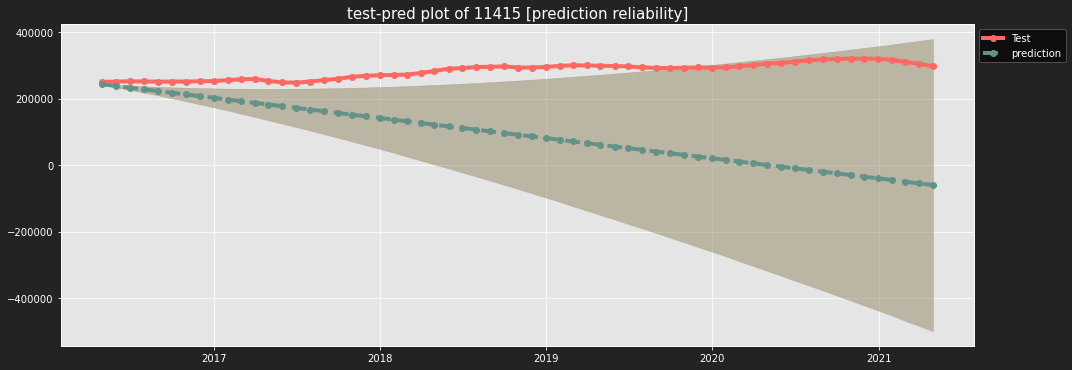

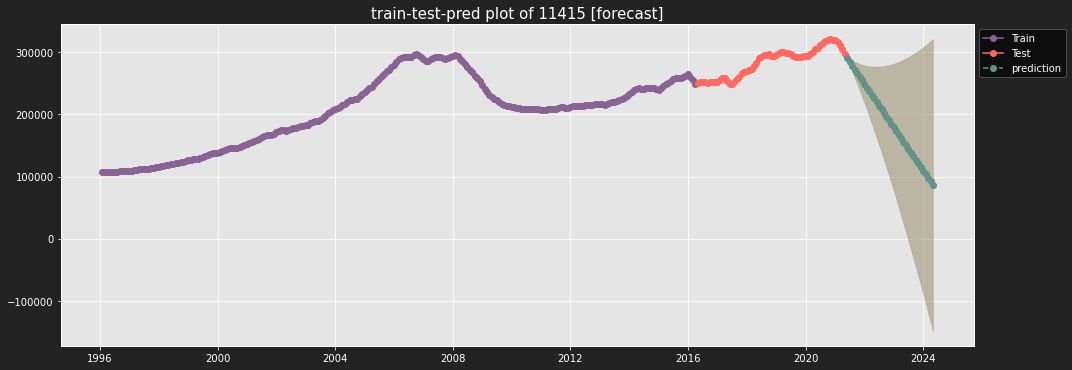

 Insights:


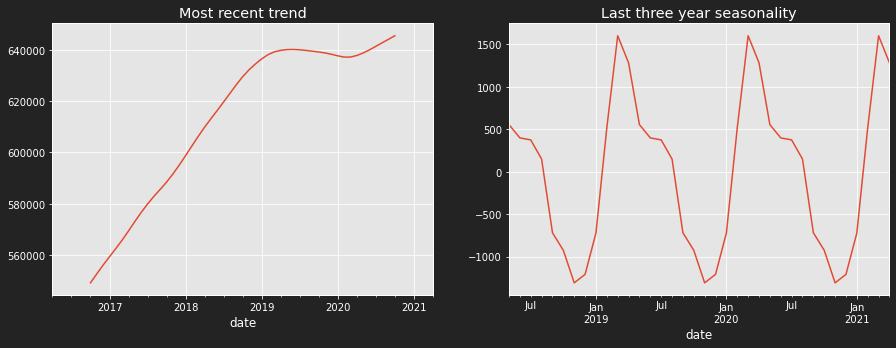

 Overall model performance and projected ROI:


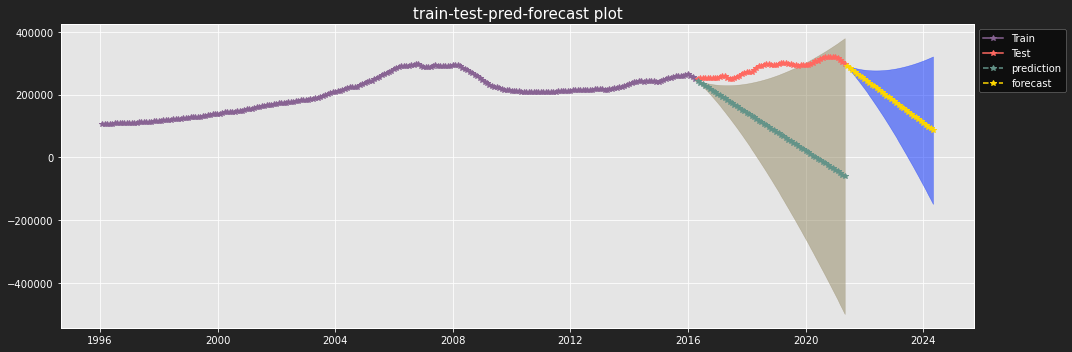

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11415               -71.04  ...                  7.98               79.01

[1 rows x 5 columns]

In [54]:
fn.model_report(und_per_model,
                results_,
                show_model_performance=True,
                show_train_fit=True,
                show_prediction=True,test_conf_int=True,
                show_detailed_prediction=True)

### Actual under performing models

In [42]:
actual_under_performing_models = ['11693', '11415']

#### Zipcode `11693`

In [43]:
zip_11693 = ts_df['11693']

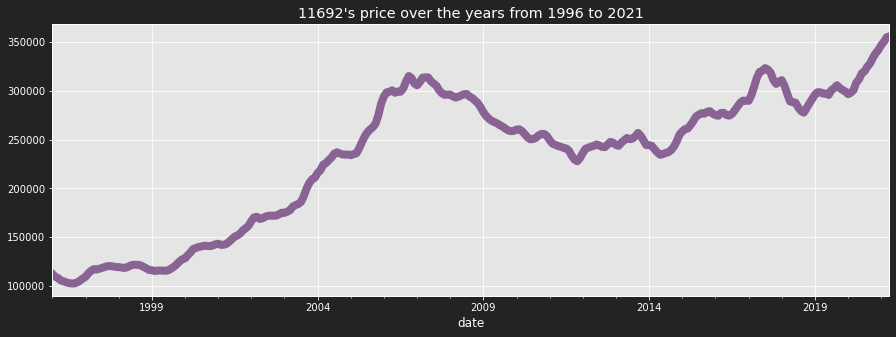

In [44]:
zip_11693.plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(zip_11693.index[0]).split(" ")[0].split("-")[0]} to {
        str(zip_11693.index[-1]).split(" ")[0].split("-")[0]}"""
);

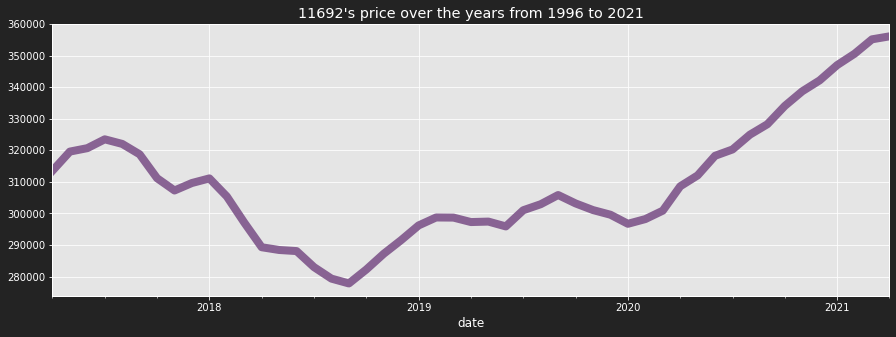

In [45]:
zip_11693['2017-04-30':].plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(zip_11693.index[0]).split(" ")[0].split("-")[0]} to {
        str(zip_11693.index[-1]).split(" ")[0].split("-")[0]}"""
);

##### Stat test

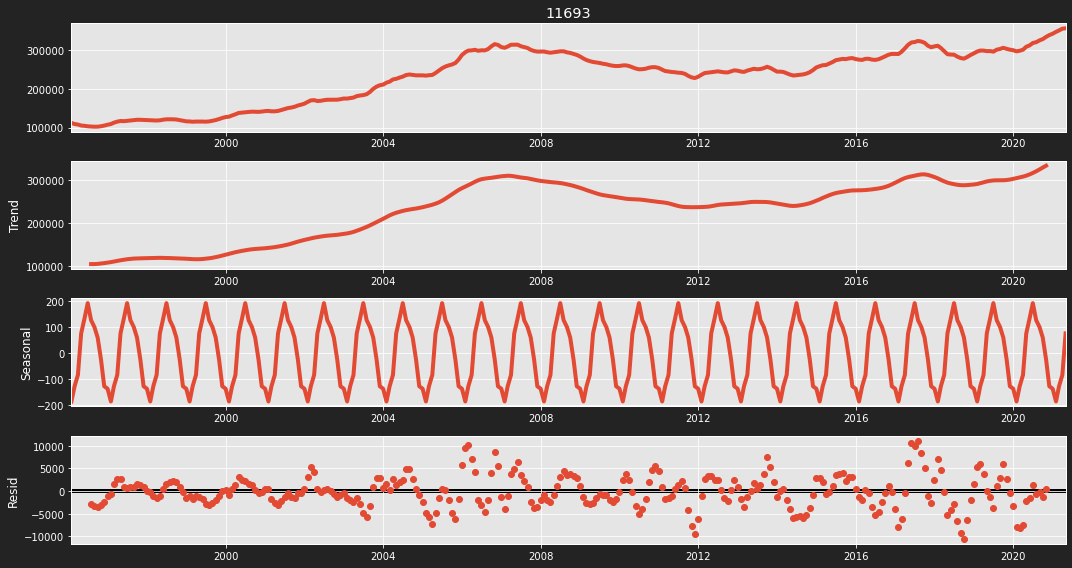

In [46]:
with mpl.rc_context():
    mpl.rc('figure', figsize=(15,8))
    mpl.rc('lines', linewidth = 4)
    tsa.seasonal_decompose(zip_11693.dropna()).plot();

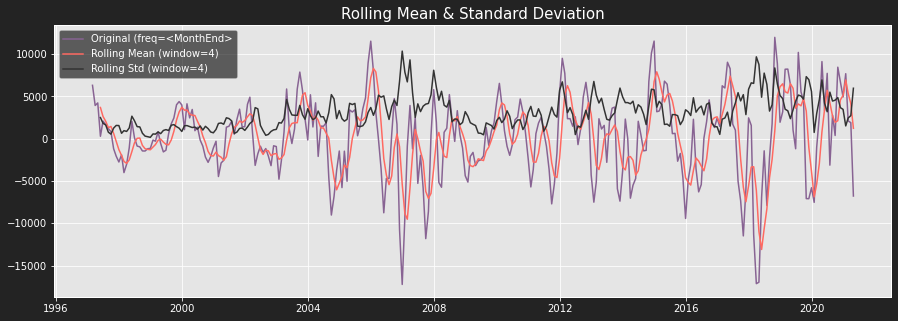

Test Statistic  #Lags Used  ...  p<.05  Stationary?
ADF Result       -4.893798          16  ...   True         True

[1 rows x 6 columns]

In [47]:
fn.stationarity_check((zip_11693.diff(1)).diff(12).dropna(), window=4)

##### Split

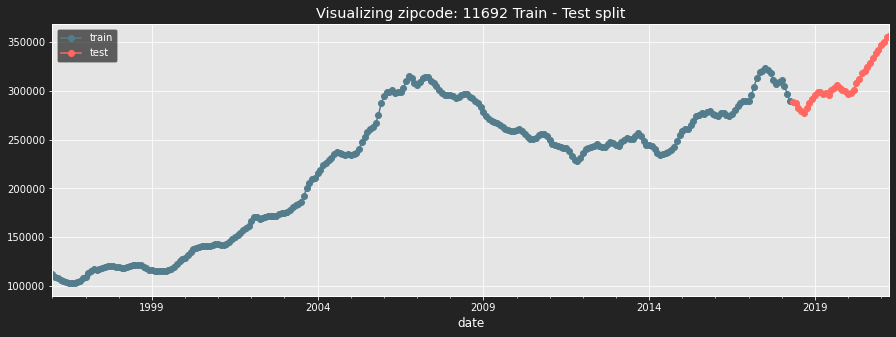

In [66]:
## train test split
num_of_steps = 36

## Split
test_11693 = zip_11693.iloc[(len(zip_11693) - num_of_steps):]
train_11693 = zip_11693.iloc[:(len(zip_11693) - num_of_steps)]

## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(ax=ax, marker='o')
train_11693.plot(**kws, label='train', color='#537d8d')
test_11693.plot(**kws, label='test', color='#ff6961')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

##### Model

###### Grid search

Performing stepwise search to minimize oob
 ARIMA(0,1,0)(0,0,0)[12] intercept   : OOB=212972519.409, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : OOB=167508922.491, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : OOB=195628397.442, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : OOB=106277638.583, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : OOB=204759111.488, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : OOB=207361041.602, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : OOB=205287350.523, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : OOB=171788163.079, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : OOB=200441096.505, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : OOB=235101216.260, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.255 seconds
                                                                       Model Diagonostics of 11693                                                             

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  268
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2515.908
Date:                Sat, 19 Jun 2021   AIC                           5033.816
Time:                        03:57:03   BIC                           5037.403
Sample:                             0   HQIC                          5035.257
                                - 268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.883e+06   6.06e+05     14.656      0.000     7.7e+06    1.01e+07
===================================================================================
Ljung-Box (L1) (Q):                 140.75   Jarque-Bera (JB):                15.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.13   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

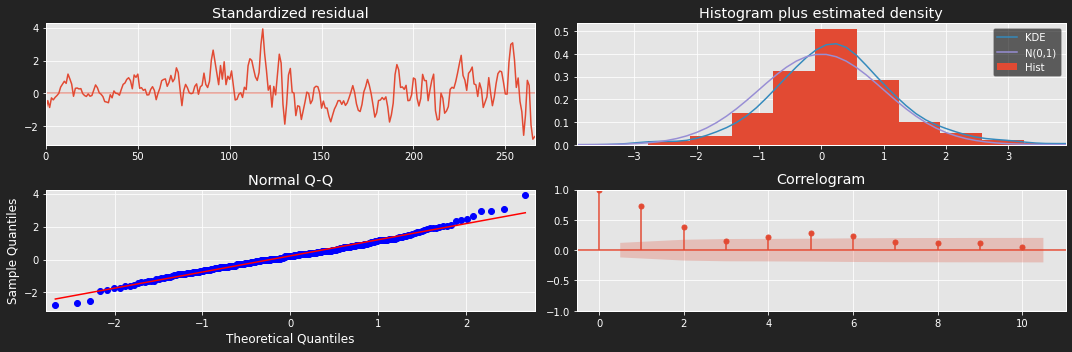

                                                                       Performance on test data of 11693                                                                      
Root Mean Squared Error of test and prediction: 29175.89351816553
Mean Squared Error: 851232762.5833334
Mean Absolute Error: 21410.63888888889


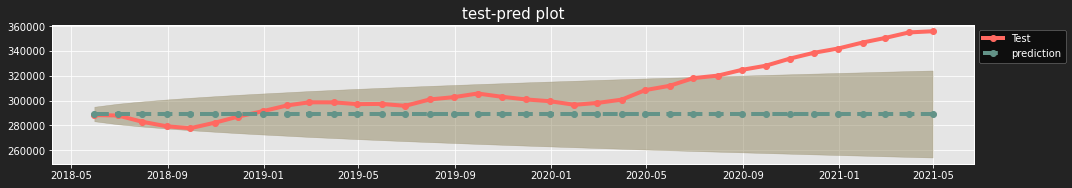

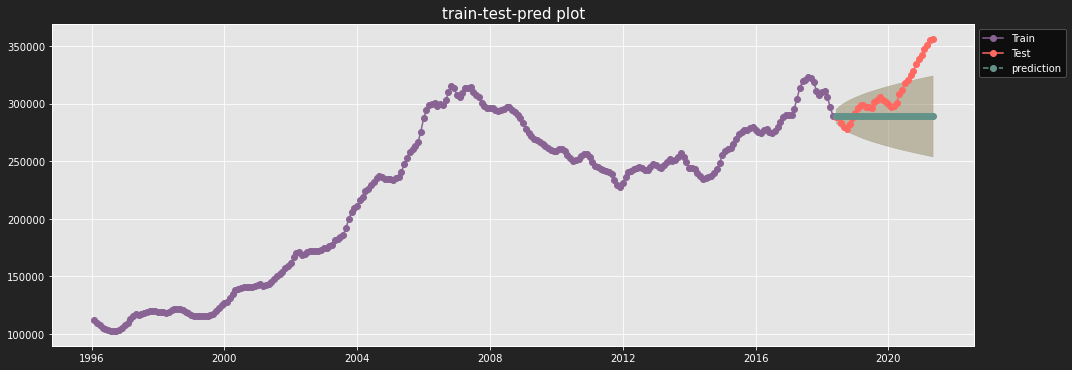

                                                                       Forecast of 11693                                                                      


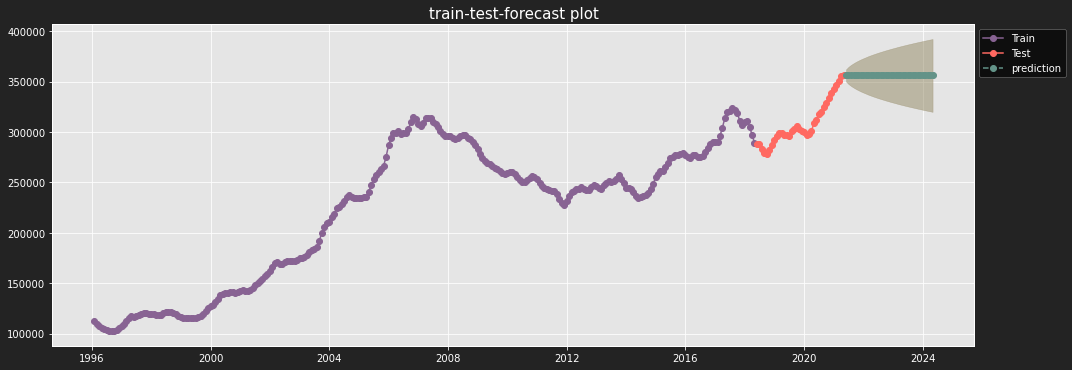

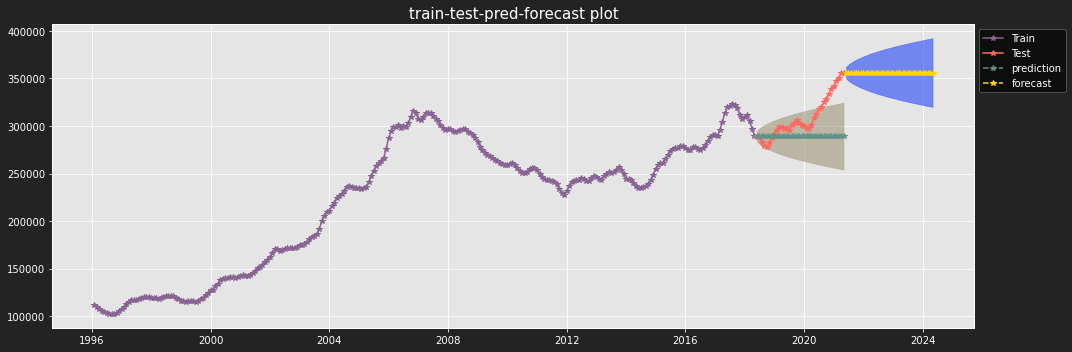

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11693                  0.0  ...                 10.15               10.15

[1 rows x 5 columns]

In [67]:
_, pred_11693, forecast_11693 = fn.grid_search(zip_11693, train_11693, test_11693)

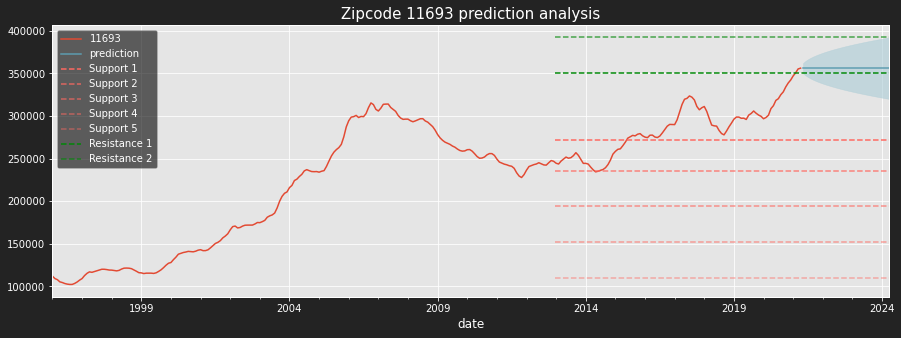

In [68]:
fn.prediction_analysis(zip_11693, test_11693, forecast_11693);

###### Inference <br>

Even with modified train test split it does not change forecasted ROI. For that reason, not appending results to decision dataframe.
Valid for short term

#### Zipcode `11415`

In [48]:
zip_11415 = ts_df['11415']

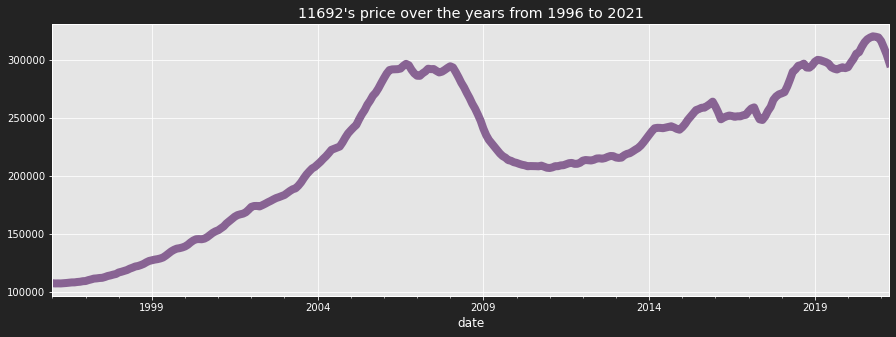

In [49]:
zip_11415.plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(zip_11415.index[0]).split(" ")[0].split("-")[0]} to {
        str(zip_11415.index[-1]).split(" ")[0].split("-")[0]}"""
);

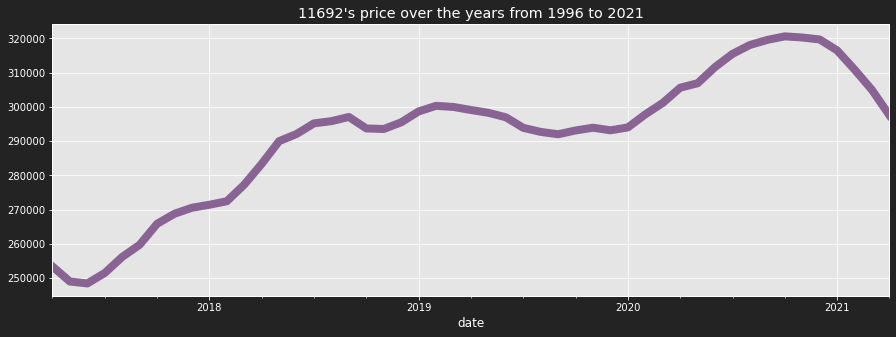

In [50]:
zip_11415['2017-04-30':].plot(
    figsize=(15, 5),
    legend=0,
    color='#886393',
    lw=8,
    title=
    f"""{zipcode}'s price over the years from {
        str(zip_11415.index[0]).split(" ")[0].split("-")[0]} to {
        str(zip_11415.index[-1]).split(" ")[0].split("-")[0]}"""
);

##### Stat test

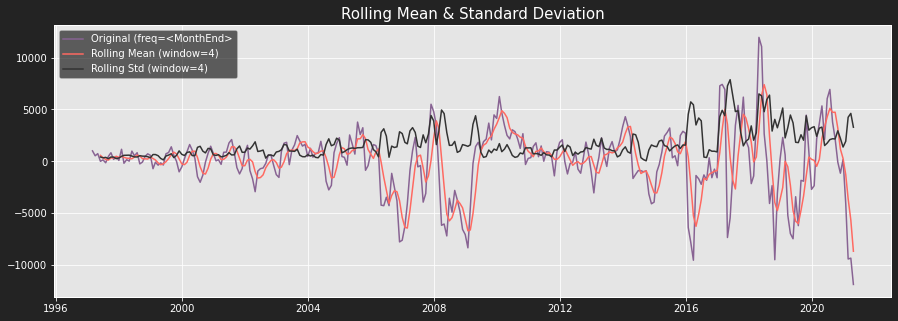

Test Statistic  #Lags Used  ...  p<.05  Stationary?
ADF Result        -3.48066          15  ...   True         True

[1 rows x 6 columns]

In [62]:
fn.stationarity_check((zip_11415.diff(1)).diff(12).dropna(), window=4)

##### Train test split

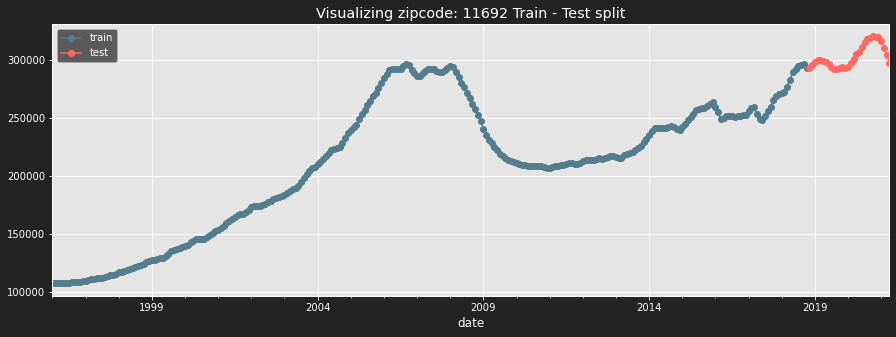

In [51]:
## train test split
num_of_steps = 30

## Split
test_11415 = zip_11415.iloc[(len(zip_11415) - num_of_steps):]
train_11415 = zip_11415.iloc[:(len(zip_11415) - num_of_steps)]

## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(ax=ax, marker='o')
train_11415.plot(**kws, label='train', color='#537d8d')
test_11415.plot(**kws, label='test', color='#ff6961')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

##### Grid search

Performing stepwise search to minimize oob
 ARIMA(0,2,0)(0,0,0)[12]             : OOB=599119086.167, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : OOB=591024521.340, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : OOB=593676952.101, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[12]             : OOB=604205075.819, Time=0.04 sec
 ARIMA(1,2,0)(2,0,0)[12]             : OOB=585641304.192, Time=0.27 sec
 ARIMA(1,2,0)(3,0,0)[12]             : OOB=588023147.458, Time=0.50 sec
 ARIMA(1,2,0)(2,0,1)[12]             : OOB=585168432.666, Time=0.51 sec
 ARIMA(1,2,0)(1,0,1)[12]             : OOB=585902933.774, Time=0.26 sec
 ARIMA(1,2,0)(3,0,1)[12]             : OOB=inf, Time=2.34 sec
 ARIMA(1,2,0)(2,0,2)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(1,2,0)(1,0,2)[12]             : OOB=inf, Time=1.44 sec
 ARIMA(1,2,0)(3,0,2)[12]             : OOB=inf, Time=2.43 sec
 ARIMA(0,2,0)(2,0,1)[12]             : OOB=578403602.215, Time=0.36 sec
 ARIMA(0,2,0)(1,0,1)[12]             : OOB=578706269.663, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  274
Model:             SARIMAX(0, 2, 0)x(2, 0, [1], 12)   Log Likelihood               -2349.145
Date:                              Sat, 19 Jun 2021   AIC                           4706.291
Time:                                      02:05:55   BIC                           4720.714
Sample:                                           0   HQIC                          4712.081
                                              - 274                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3398     35.076     -0.010      0.992     -69.088      68.409
ar.S.L24      -0.0225      3.384     -0.007      0.995      -6.654       6.609
ma.S.L12       0.2436     35.076      0.007      0.994     -68.503      68.991
sigma2          1e+06   2.95e+04     33.896      0.000    9.42e+05    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               725.38
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               7.88   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

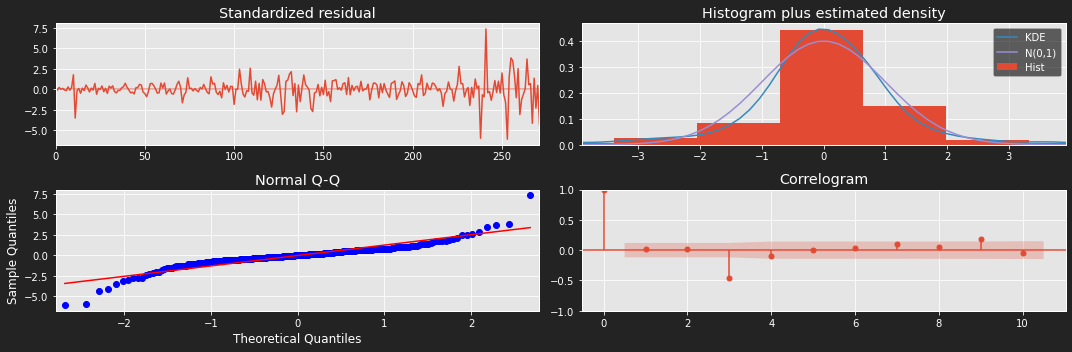

                                                                       Performance on test data of 11415                                                                      
Root Mean Squared Error of test and prediction: 62901.06651441087
Mean Squared Error: 3956544168.6503406
Mean Absolute Error: 54555.20333246527


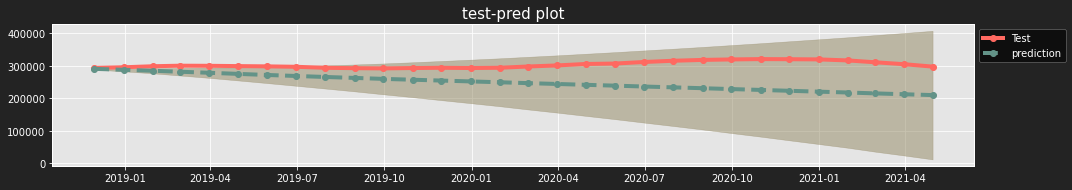

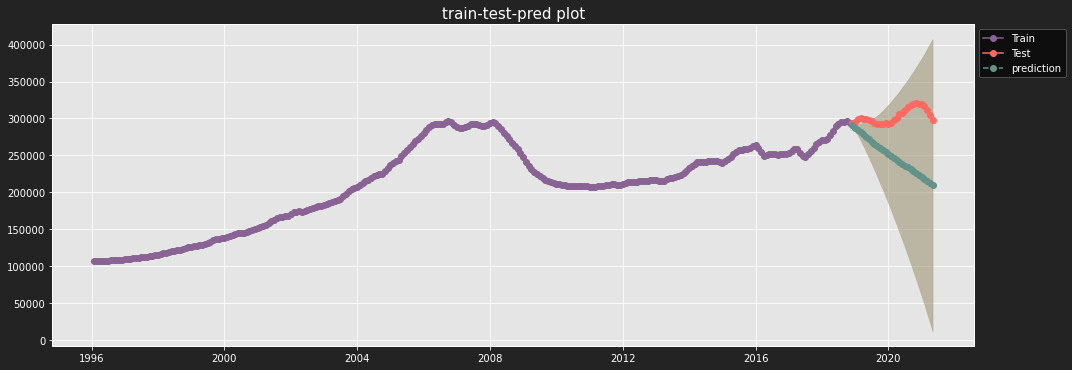

                                                                       Forecast of 11415                                                                      


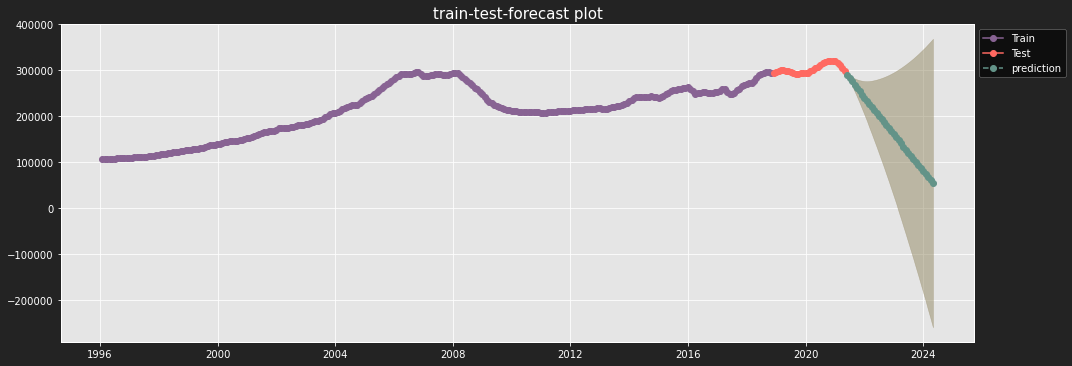

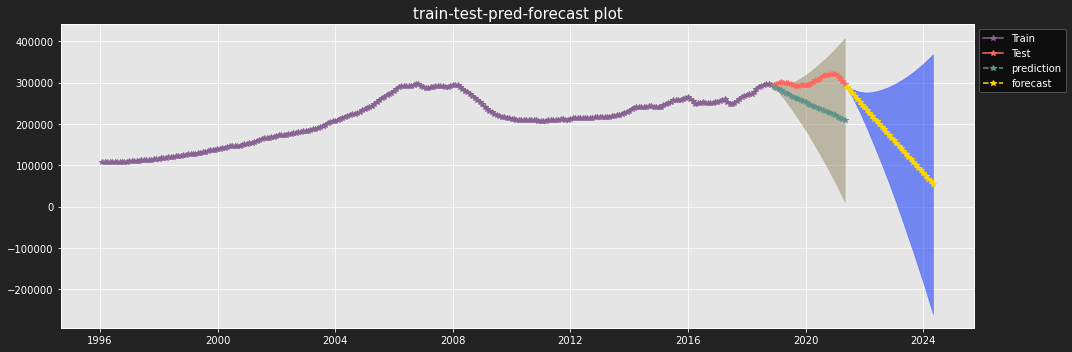

zipcode  mean_forecasted_roi  ...  upper_forecasted_roi  std_forecasted_roi
0   11415               -81.78  ...                 23.91              105.69

[1 rows x 5 columns]

In [52]:
_, pred_11415, forecast_11415 =fn.grid_search(zip_11415, train_11415, test_11415)

not expected to go below support level

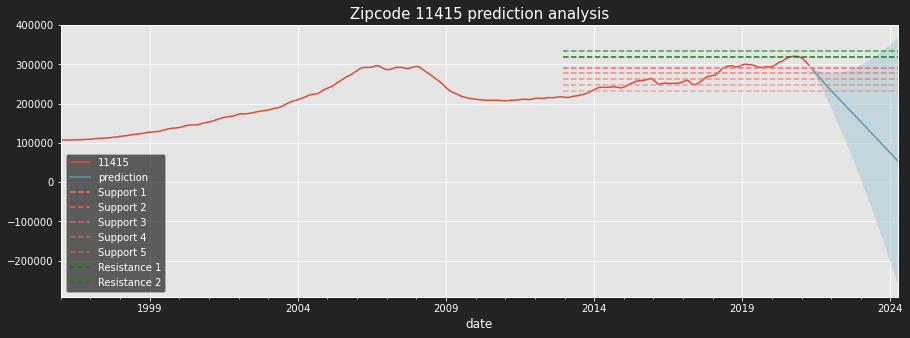

In [59]:
fn.prediction_analysis(zip_11415, test_11415, forecast_11415);

# INTERPRET

In [ ]:
# final
fn.output_df(zipcode_list, results_)

# RECOMMENDATION

# CONCLUSION

- TVM
- Model generalization

# NEXT STEPS

# APPENDIX

## Prophet

In [72]:
try:
    from fbprophet import Prophet
except:
    !pip install fbprophet
    # for troubleshooting: https://facebook.github.io/prophet/docs/installation.html#python
from statsmodels.tools.eval_measures import rmse

In [61]:
actual_under_performing_models

['11693', '11415']

In [55]:
zipcode='11693'

In [61]:
ts_df[zipcode]

date
1996-01-31    112014.0
1996-02-29    109195.0
1996-03-31    107898.0
1996-04-30    105353.0
1996-05-31    104549.0
                ...   
2020-12-31    342164.0
2021-01-31    346986.0
2021-02-28    350591.0
2021-03-31    355157.0
2021-04-30    356097.0
Freq: M, Name: 11693, Length: 304, dtype: float64

In [62]:
ts_proph = ts_df[zipcode]

In [63]:
ts_proph = ts_proph.reset_index()

In [64]:
ts_proph.columns = ['ds','y']

In [65]:
ts_proph

ds         y
0   1996-01-31  112014.0
1   1996-02-29  109195.0
2   1996-03-31  107898.0
3   1996-04-30  105353.0
4   1996-05-31  104549.0
..         ...       ...
299 2020-12-31  342164.0
300 2021-01-31  346986.0
301 2021-02-28  350591.0
302 2021-03-31  355157.0
303 2021-04-30  356097.0

[304 rows x 2 columns]

In [66]:
ts_proph.dtypes

ds    datetime64[ns]
y            float64
dtype: object

<AxesSubplot:xlabel='ds'>

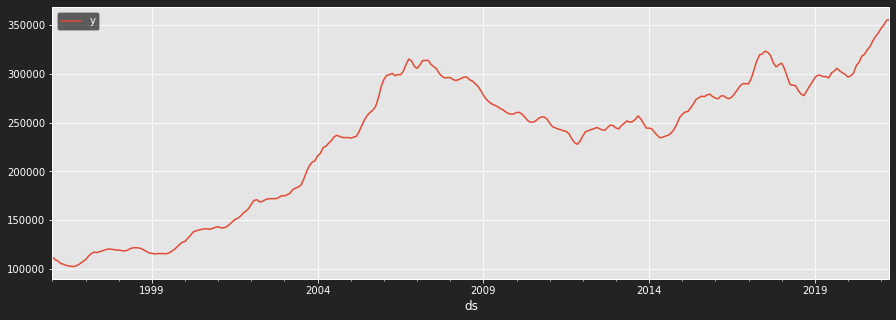

In [67]:
ts_proph.plot(x='ds', y='y', figsize=(15, 5))

In [68]:
len(ts_proph)

304

In [69]:
train = ts_proph.iloc[:len(ts_proph) - 36]
test = ts_proph.iloc[len(ts_proph) - 36:]

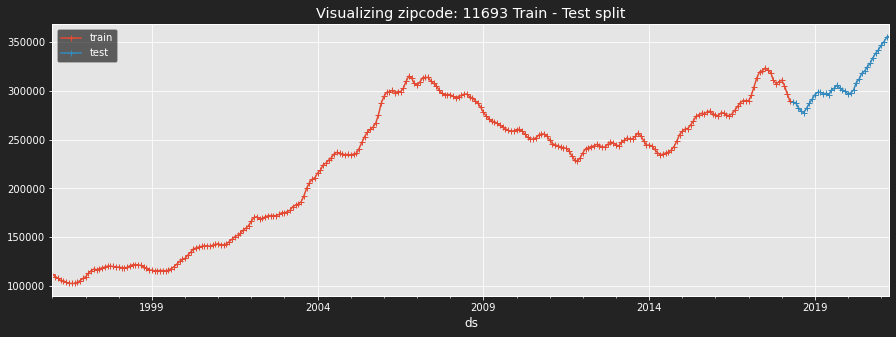

In [70]:
## Visualize the train-test split split
fig, ax = plt.subplots(figsize=(15, 5))
kws = dict(x='ds',y='y', ax=ax, marker='+')
train.plot(**kws, label='train')
test.plot(**kws, label='test')
ax.legend()
plt.title(f'Visualizing zipcode: {zipcode} Train - Test split')
plt.show()

In [73]:
m = Prophet(interval_width=0.95,
            weekly_seasonality=False,
            daily_seasonality=False,seasonality_mode='additive')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(train)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

In [74]:
# forecast.tail()

<AxesSubplot:xlabel='ds'>

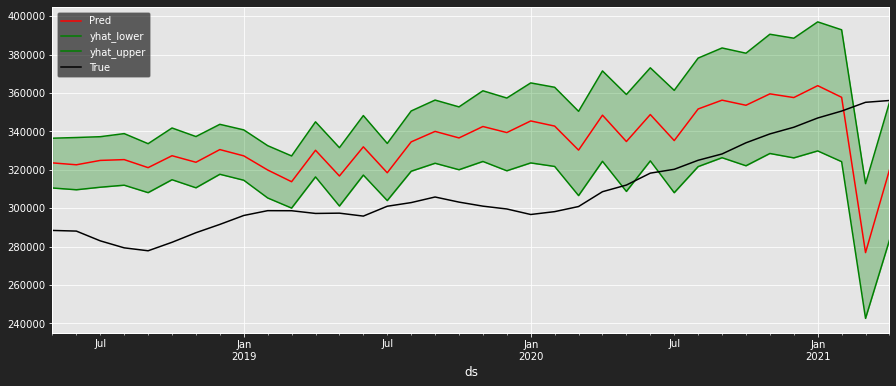

In [75]:
ax = forecast[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat',
                                        label='Pred',
                                        legend=True,
                                        figsize=(15, 6),
                                        color='red')
forecast.iloc[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat_lower',
                                        ax=ax,
                                        color='g')
forecast.iloc[len(ts_proph) - 36:].plot(x='ds',
                                        y='yhat_upper',
                                        ax=ax,
                                        color='g')
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)
test.plot(x='ds', y='y', label='True', legend=True, ax=ax, color='k')

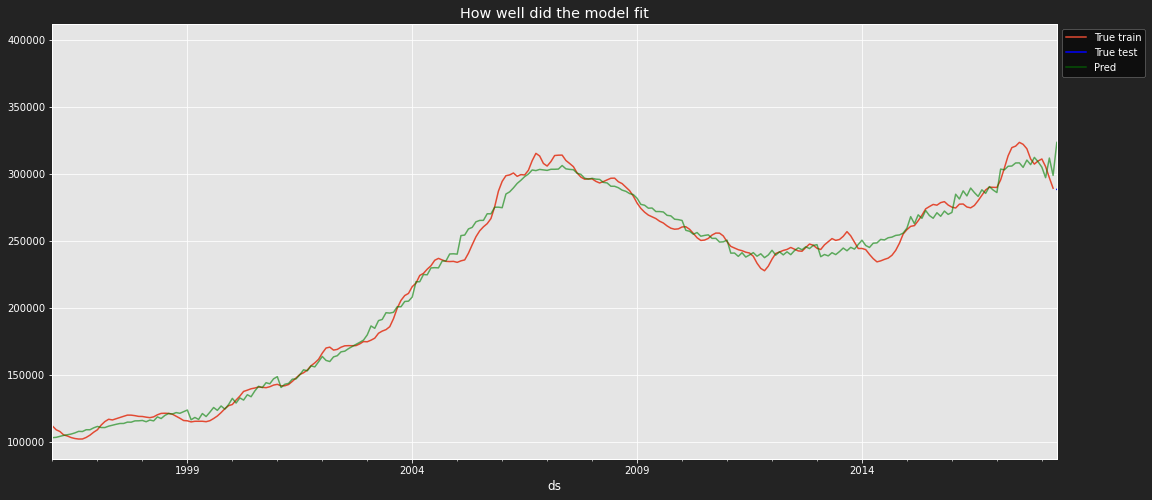

In [76]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

ax.set_xlim((forecast.iloc[0]['ds'], forecast.iloc[len(ts_proph) - 36]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title('How well did the model fit')
plt.show()

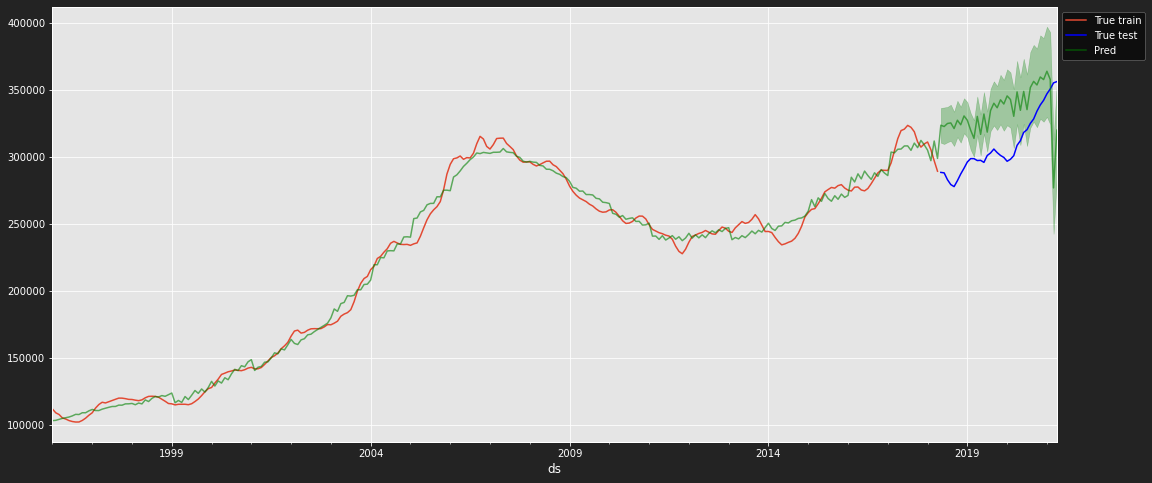

In [77]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

# ax.set_xlim((forecast.iloc[len(ts_proph) - 36]['ds'], forecast.iloc[-1]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

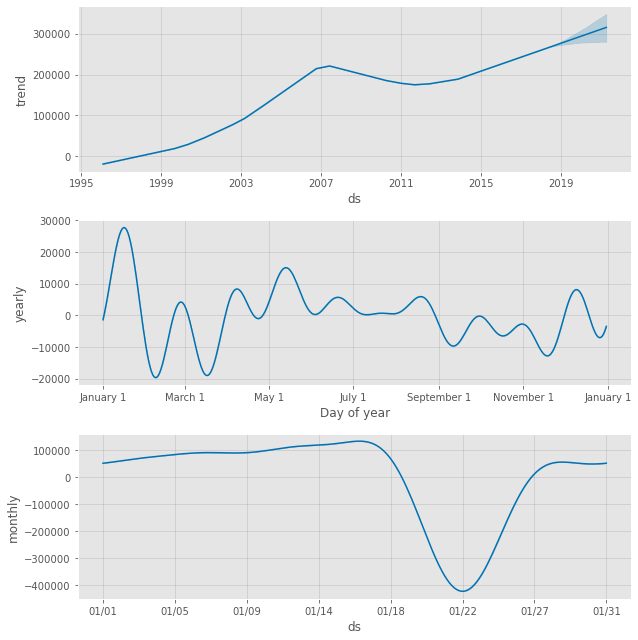

In [78]:
with plt.style.context('ggplot'):
    m.plot_components(forecast)

In [62]:
rmse(forecast.iloc[len(ts_proph) - 36:]['yhat'], test['y'])

18461.86878802158

In [63]:
test.mean(numeric_only=True)

y    591781.972222
dtype: float64

In [64]:
test.std(numeric_only=True)

y    11367.179322
dtype: float64

In [53]:
m = Prophet(interval_width=0.95,
            weekly_seasonality=False,
            daily_seasonality=False,seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(ts_proph)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

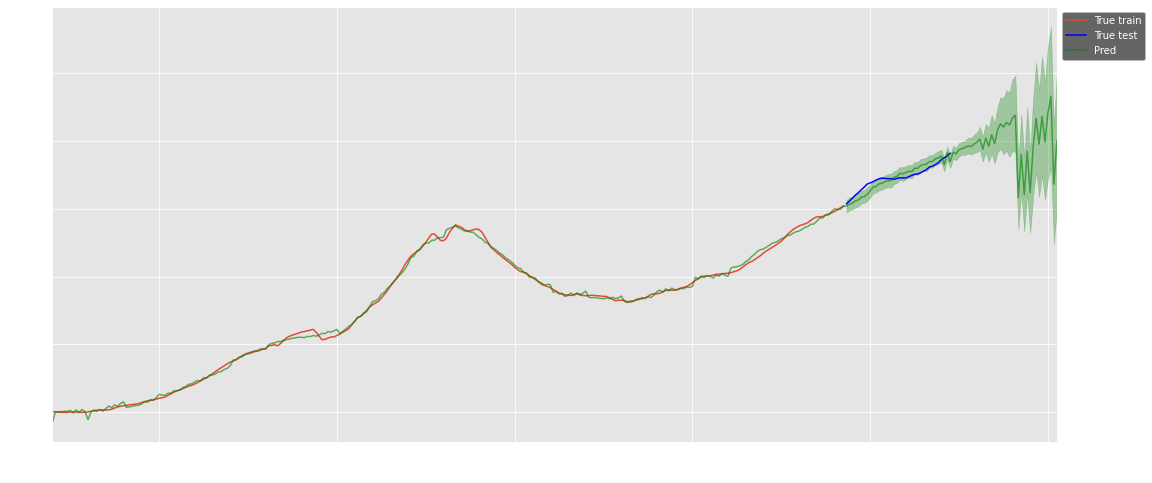

In [56]:
ax = train.plot(x='ds',
                y='y',
                label='True train',
                legend=True,
                figsize=(18, 8))
test.plot(x='ds', y='y', label='True test', legend=True, ax=ax, color='b')
forecast.plot(x='ds',
              y='yhat',
              label='Pred',
              legend=True,
              color='g',
              ax=ax,
              alpha=.6)
ax.fill_between(x=forecast.iloc[len(ts_proph) - 36:]['ds'].values,
                y1=forecast.iloc[len(ts_proph) - 36:]['yhat_lower'],
                y2=forecast.iloc[len(ts_proph) - 36:]['yhat_upper'],
                color='g',
                alpha=.3)

# ax.set_xlim((forecast.iloc[len(ts_proph) - 36]['ds'], forecast.iloc[-1]['ds']))
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Not good yet

## RNN

In [ ]:
# gluon package